# Loading and Analysing Cluster Simulation Data

### Defining some helper functions to load and collect the data in a nice format

In [95]:
!pwd

/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/Loss_landscapes/Digital VQE Simulations


In [96]:
import pickle

def load_simulation_dictionaries(simulation_data_names_file):

    simulation_data_directory = 'Cluster_Results/AD_Results'

    # simulaiton_data_names_file = '4qubits00field.txt'

    simulation_data_paths = simulation_data_directory + '/' + simulation_data_names_file

    # Open the file in read mode
    with open(simulation_data_paths, 'r') as file:
        # Read the contents of the file
        simualtion_data_files = file.read().splitlines()

    # Print the file contents

    trials = len(simualtion_data_files)

    # print(f'Total number of simulations: {trials}')

    simulation_dictionaries = []

    for file_path in simualtion_data_files:

        with open(f'Cluster_Results/AD_Results/{file_path}', 'rb') as file:
            # Load the dictionary from the pickle file
            dictionary = pickle.load(file)
            simulation_dictionaries.append(dictionary)

        # print(f'{file_path} succesfully loaded into dictionary!')
    
    print(f'    Succesfully loaded {trials} simulations!')

    return simulation_dictionaries
        

In [97]:
# Sorting the simulations results
import numpy as np

def sort_simulation_dictionaries(simulation_dictionaries):

    simulation_dictionaries = np.asarray(simulation_dictionaries)

    final_energies = []

    for simulation_data in simulation_dictionaries:

        final_energy = simulation_data['simulation_results']['cost_trajectory'][-1]
        final_energies.append(final_energy)
        # print(final_energy)

    final_energies = np.asarray(final_energies)

    # print(final_energies)

    sorted_indices = np.argsort(final_energies)

    # print(sorted_indices)
    # print(final_energies[sorted_indices])

    sorted_simulation_dictionaries = simulation_dictionaries[sorted_indices]
    # print(sorted_simulation_dictionaries)

    return sorted_simulation_dictionaries



In [98]:

def collect_simulation_dictionaries(sorted_simulation_dictionaries):

    example_dictionary = sorted_simulation_dictionaries[0]

    trials = len(sorted_simulation_dictionaries)

    n_qubits = example_dictionary['qubits']
    epochs = example_dictionary['epochs']
    transverse_field_coefficient = example_dictionary['transverse_field_coefficient']
    loss_hamiltonian = example_dictionary['loss_hamiltonian']
    loss_hamiltonian_spectrum = example_dictionary['loss_hamiltonian_spectrum']#.eigenvalues.detach().numpy()
    learning_rate = example_dictionary['learning_rate']


    # simulation_results = example_dictionary['simulation_results']
    # # print(simulation_results.keys())
    # cost_trajectory = simulation_results['cost_trajectory']
    # parameters_trajectory = simulation_results['parameters_trajectory']
    # final_gradient = simulation_results['final_gradient']
    # print(simulation_results['final_hessian'].keys())
    # final_hessian = simulation_results['final_hessian']['hessian_matrix']
    # final_hessian_determinant = simulation_results['final_hessian']['determinant']
    # final_hessian_eigenvalues = simulation_results['final_hessian']['eigenvalues']
    # final_hessian_min_eigval = simulation_results['final_hessian']['min_eigval']
    # final_hessian_max_eigval = simulation_results['final_hessian']['max_eigval']
    # final_hessian_minmax_ratio = simulation_results['final_hessian']['minmax_ratio']
    # print(simulation_results['cost_trajectory'])
    # print(final_cost)
    # print(simulation_results['final_hessian'])

        
    all_parameters_trajectories = []
    all_costs_trajectories = []
    all_final_parameters = []
    all_final_gradients = []
    all_final_hessians = []
    all_final_hessian_determinants = []
    all_final_hessians_eigenvalues = []
    hessian_min_eigenvalues = [] 
    hessian_max_eigenvalues = []
    hessian_eigenvalues_ratio = []




    for simulation_dictionary in sorted_simulation_dictionaries:
        
        simulation_results = simulation_dictionary['simulation_results']

        # print(simulation_results.keys())

        cost_trajectory = simulation_results['cost_trajectory']
        parameters_trajectory = simulation_results['parameters_trajectory']
        final_parameters = parameters_trajectory[-1]
        final_gradient = simulation_results['final_gradient']
        # print(simulation_results['final_hessian'].keys())
        final_hessian = simulation_results['final_hessian']['hessian_matrix']#.detach().numpy()
        final_hessian_determinant = simulation_results['final_hessian']['determinant']#.detach().numpy()
        final_hessian_eigenvalues = simulation_results['final_hessian']['eigenvalues']#.detach().numpy()
        final_hessian_min_eigval = simulation_results['final_hessian']['min_eigval']#.detach().numpy()
        final_hessian_max_eigval = simulation_results['final_hessian']['max_eigval']#.detach().numpy()
        final_hessian_minmax_ratio = simulation_results['final_hessian']['minmax_ratio']#.detach().numpy()

        all_parameters_trajectories.append(parameters_trajectory)
        all_costs_trajectories.append(cost_trajectory)
        all_final_parameters.append(final_parameters)
        all_final_gradients.append(final_gradient)
        all_final_hessians.append(final_hessian)
        all_final_hessian_determinants.append(final_hessian_determinant)
        all_final_hessians_eigenvalues.append(final_hessian_eigenvalues)
        hessian_min_eigenvalues.append(final_hessian_min_eigval)
        hessian_max_eigenvalues.append(final_hessian_max_eigval)
        hessian_eigenvalues_ratio.append(final_hessian_minmax_ratio)


    all_parameters_trajectories = np.asarray(all_parameters_trajectories)
    all_costs_trajectories = np.asarray(all_costs_trajectories)
    all_final_parameters = np.asarray(all_final_parameters)
    all_final_gradients = np.asarray(all_final_gradients)
    all_final_hessians = np.asarray(all_final_hessians)
    all_final_hessian_determinants = np.asarray(all_final_hessian_determinants)
    all_final_hessians_eigenvalues = np.asarray(all_final_hessians_eigenvalues)
    hessian_min_eigenvalues = np.asarray(hessian_min_eigenvalues)
    hessian_max_eigenvalues = np.asarray(hessian_max_eigenvalues)
    hessian_eigenvalues_ratio = np.asarray(hessian_eigenvalues_ratio)


    formatted_simulation_data =  {
        'qubits': n_qubits,
        'transverse_field_coefficient': transverse_field_coefficient,
        'epochs': epochs,
        'learning_rate': learning_rate,
        'trials': trials,
        'loss_hamiltonian': loss_hamiltonian,
        'loss_hamiltonian_spectrum': loss_hamiltonian_spectrum,
        'simulation_results': {
            'all_parameters_trajectories': all_parameters_trajectories,
            'all_costs_trajectories': all_costs_trajectories,
            'all_final_parameters': all_final_parameters,
            'all_final_gradients': all_final_gradients,
            'all_final_hessians': all_final_hessians,
            'all_final_hessian_determinants': all_final_hessian_determinants,
            'all_final_hessians_eigenvalues': all_final_hessians_eigenvalues,
            'hessian_min_eigenvalues': hessian_min_eigenvalues,
            'hessian_max_eigenvalues': hessian_max_eigenvalues,
            'hessian_eigenvalues_ratio':hessian_eigenvalues_ratio
        }
    }

    return formatted_simulation_data


## Loading the data

The formnatted simulation dictionaries are stored in a list 

In [99]:
from time import sleep

simulation_data_names_files = ['3qubits00field.txt', '3qubits01field.txt', '4qubits00field.txt', '4qubits01field.txt', '5qubits00field.txt', '5qubits01field.txt', '6qubits00field.txt', '6qubits01field.txt', '7qubits00field.txt', '7qubits01field.txt',  '8qubits00field.txt', '8qubits01field.txt', '9qubits00field.txt', '9qubits01field.txt', '10qubits00field.txt', '10qubits01field.txt',]

# simulation_data_names_file = '4qubits00field.txt'

vqe_problems = []

for simulation_data_names_file in simulation_data_names_files:

    print(f'Loading {simulation_data_names_file} data')

    simulation_dictionaries = load_simulation_dictionaries(simulation_data_names_file)

    sorted_simulation_dictionaries = sort_simulation_dictionaries(simulation_dictionaries)

    # print(simulation_dictionaries[0].keys())


    formatted_simulation_data = collect_simulation_dictionaries(sorted_simulation_dictionaries)

    vqe_problems.append(formatted_simulation_data)
    print(formatted_simulation_data)

# print(vqe_problems)
    

Loading 3qubits00field.txt data


    Succesfully loaded 100 simulations!
{'qubits': 3, 'transverse_field_coefficient': 0.0, 'epochs': 200, 'learning_rate': 0.05, 'trials': 100, 'loss_hamiltonian': <Hamiltonian: terms=4, wires=[0, 1, 2]>, 'loss_hamiltonian_spectrum': array([-2., -2.,  0.,  0.,  0.,  0.,  2.,  2.]), 'simulation_results': {'all_parameters_trajectories': array([[[ 7.23778903e-02,  4.63249122e-02,  7.86942565e-02, ...,  4.06906355e-02,  4.58375510e-02,  7.46698351e-02],
        [ 8.80065146e-02,  8.36969801e-02,  9.29951854e-02, ...,  4.06906355e-02,  4.58375510e-02,  7.46698351e-02],
        [ 1.04975903e-01,  1.38063297e-01,  1.09572640e-01, ...,  4.06906355e-02,  4.58375510e-02,  7.46698351e-02],
        ...,
        [ 1.05248710e-02,  5.15089865e-01, -1.22086034e-02, ...,  4.06906355e-02,  4.58375510e-02,  7.46698351e-02],
        [ 1.05179513e-02,  5.15089725e-01, -1.22122249e-02, ...,  4.06906355e-02,  4.58375510e-02,  7.46698351e-02],
        [ 1.05110469e-02,  5.15089585e-01, -1.22158432e-02, ..., 

## Creating the folders to store the figures generated with ORQVIZ

First, we define a function to create a folder at a given path and then we create the folder in which to store the results for the specific loss hamiltonian

In [100]:
from os import mkdir
from os.path import exists


def create_folder(path):

  if not exists(path):
    mkdir(path)

    print("Folder %s created!" % path)
  else:
    print("Folder %s already exists" % path)


In [101]:
GLOBAL_PATH = 'Cluster_Results/'

hamiltonian_path = '1D Ising Model Figures/'

results_path = GLOBAL_PATH + hamiltonian_path

create_folder(results_path)

Folder Cluster_Results/1D Ising Model Figures/ already exists


# Visualizing Results with ORQVIZ

In [102]:
import numpy as np
import matplotlib.pyplot as plt

loss_limits = (-0.1, 1.3)

title_fontsize = 25
label_fontsize = 25 
tick_fontsize = 20
colorbar_fontsize = 20
legend_fontsize = 20

## Training Progress Histograms

In [103]:
def make_training_loss_plot(problem, ax):

    # vqe_problem = setup_vqe_problem(problem)

    simulation_results = problem['simulation_results']
    n_qubits = problem['qubits']
    transverse_field_coefficient = problem['transverse_field_coefficient']
    epochs = problem['epochs']
    trials = problem['trials']
    gs_energy = np.amin(problem['loss_hamiltonian_spectrum'])

    all_costs_trajectories = simulation_results['all_costs_trajectories']

    # fig, ax = plt.subplots()

    ax.plot(all_costs_trajectories.T, linewidth=2.5, color=plt.get_cmap("coolwarm", 7)(0), alpha=0.9)

    ax.set_title(f"Training Progress of {trials} Trials for {n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize*1, pad=20)
    ax.set_ylabel("Loss", fontsize=label_fontsize)
    ax.set_xlabel("Training Iterations", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)
    # plt.ylim(loss_limits)
    ax.plot(range(len(all_costs_trajectories[0])), [gs_energy]*len(all_costs_trajectories[0]), linestyle="dashed", color="black", label="True Ground State")
    ax.scatter([epochs, epochs, epochs], all_costs_trajectories[[0, 1, -1],-1], color=plt.get_cmap("coolwarm", 7)(6), linewidth=2, zorder=3)
    # plt.annotate("gr", xy=(epochs-10,0))

    ax.legend()

Folder Cluster_Results/1D Ising Model Figures/3 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/3 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/4 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/4 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/5 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/5 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/6 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/6 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/7 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/7 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/8 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/8 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/9 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/9 qubits/ already exists
Folder

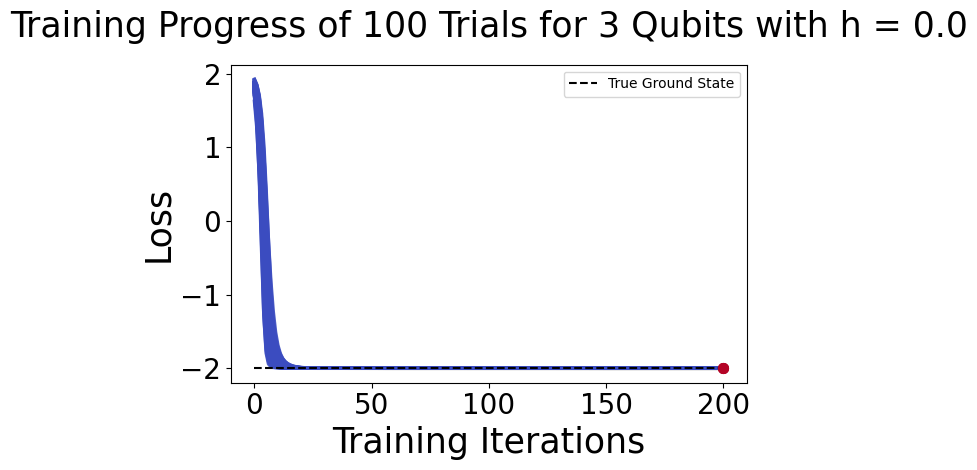

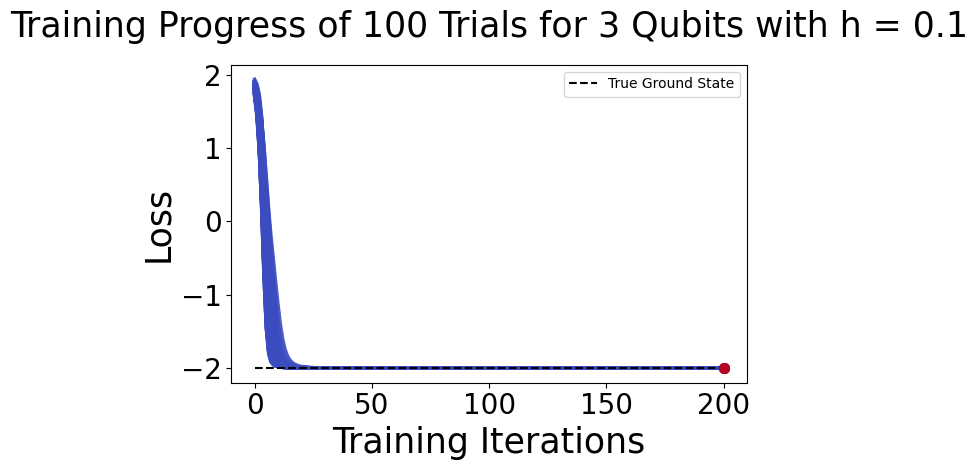

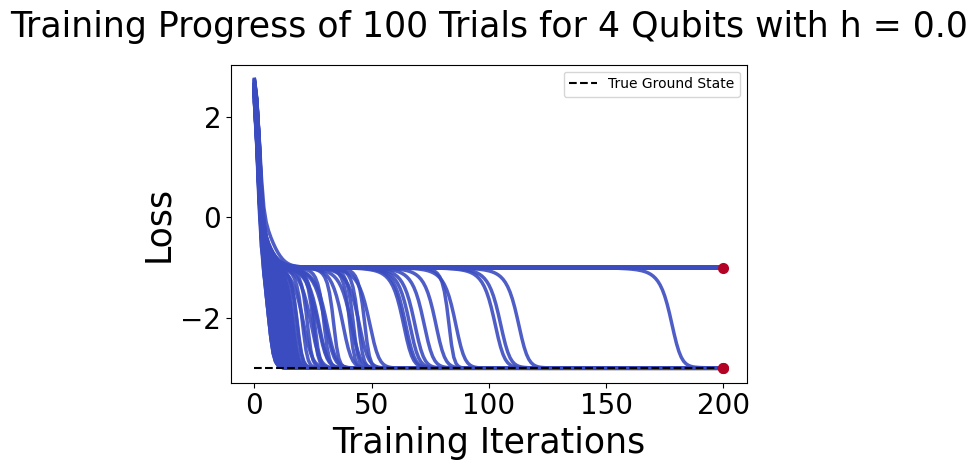

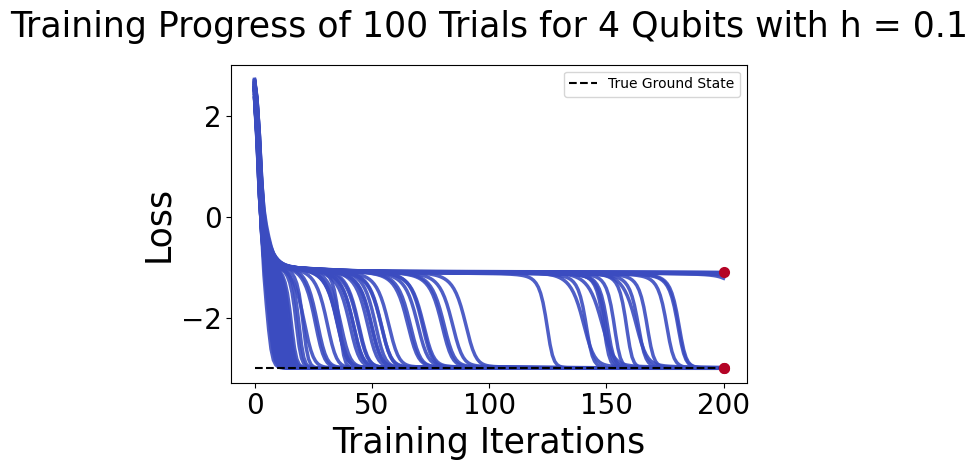

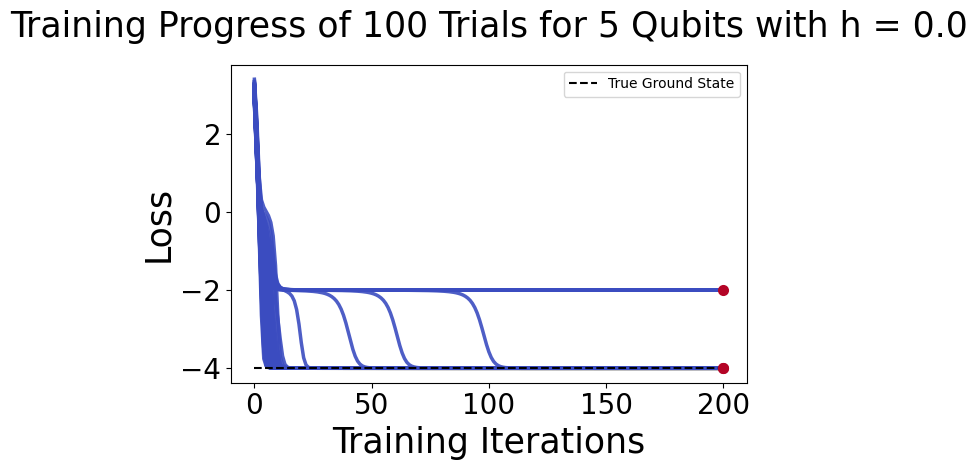

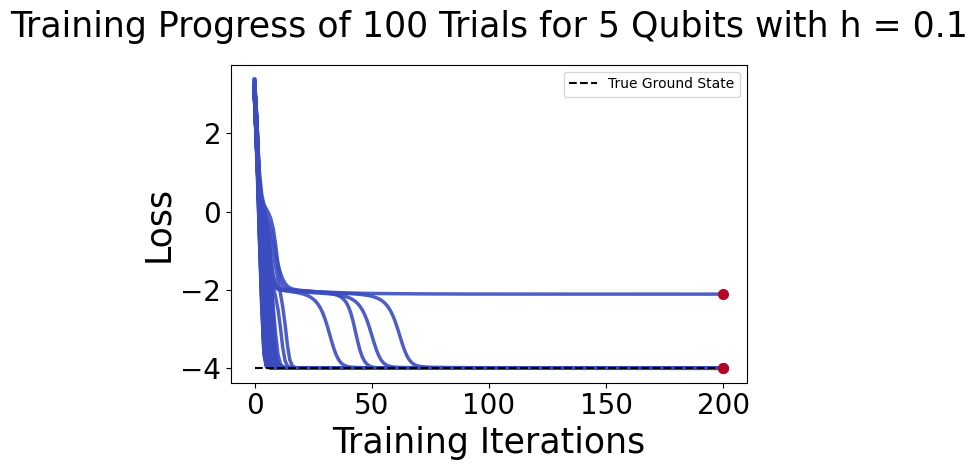

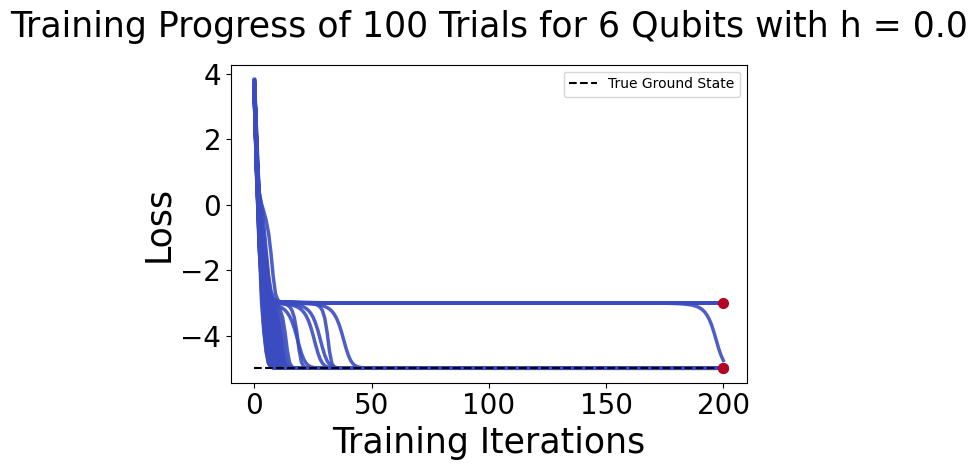

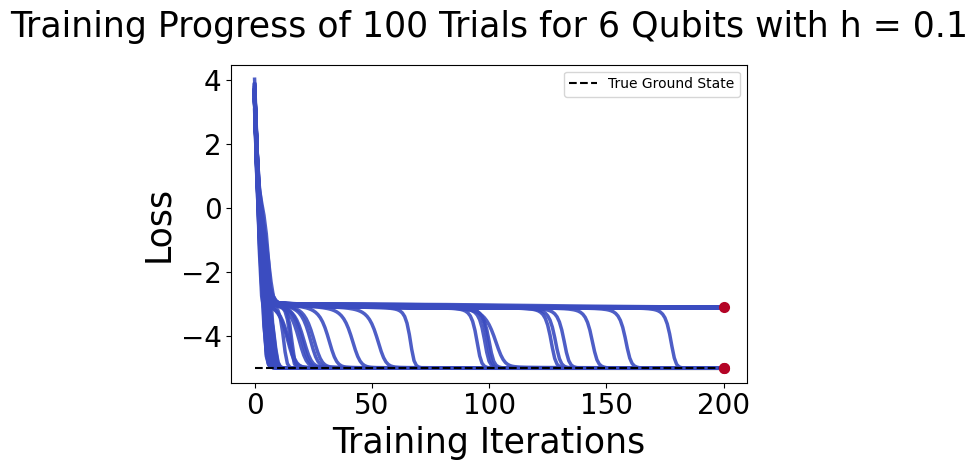

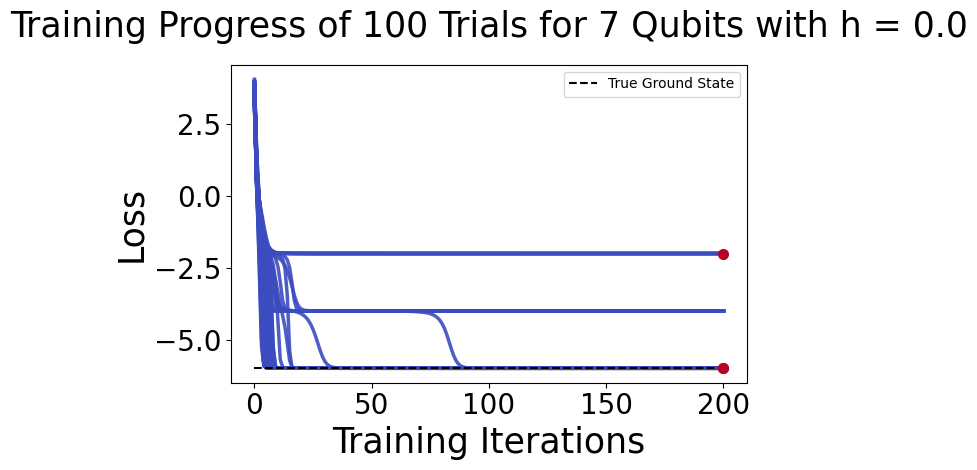

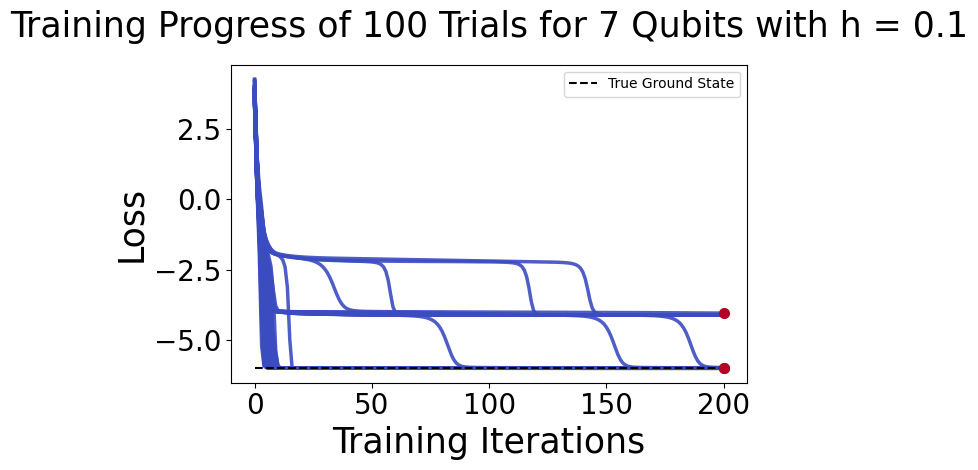

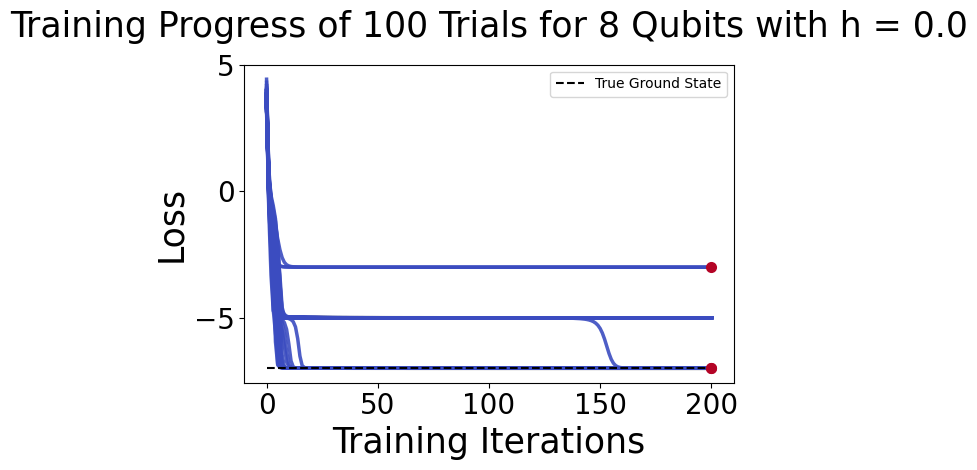

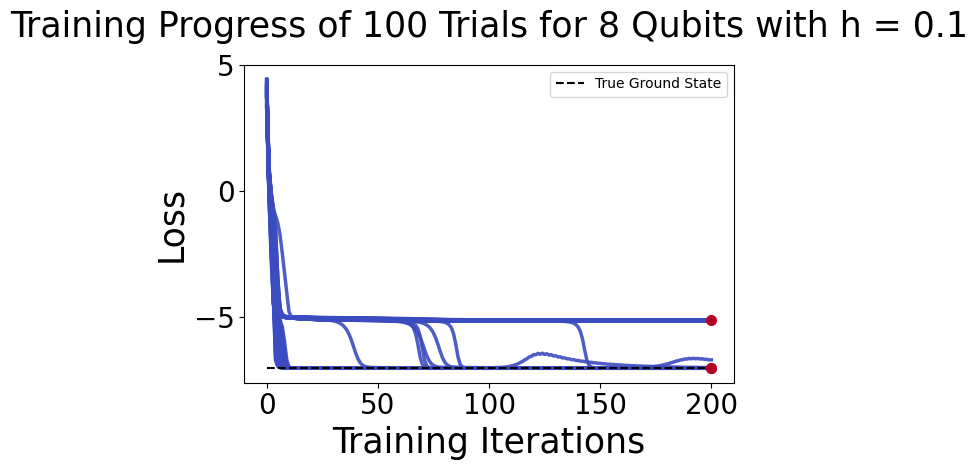

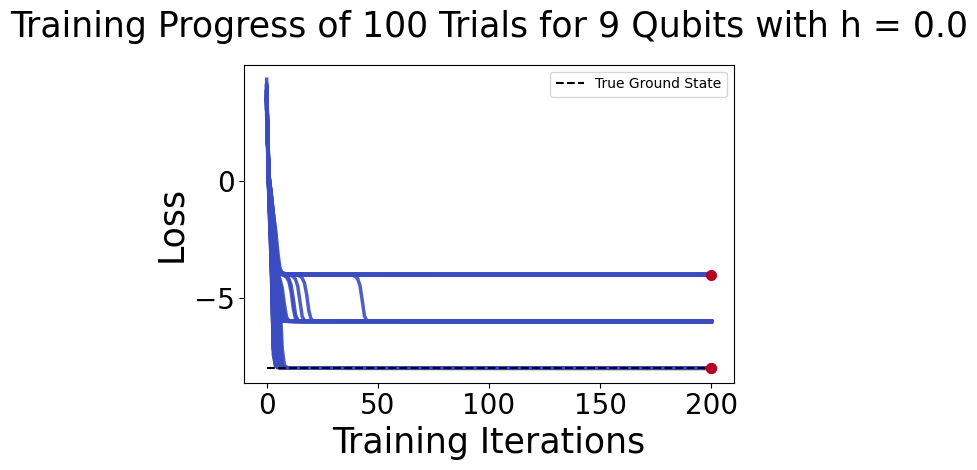

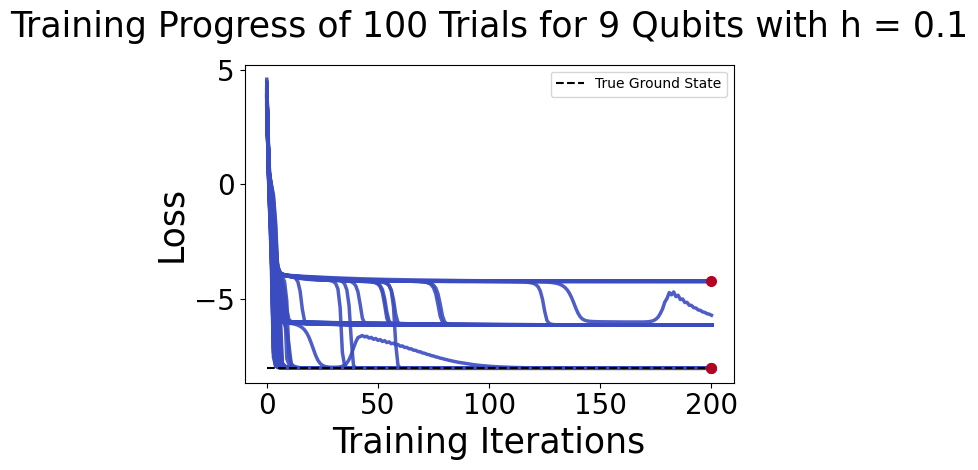

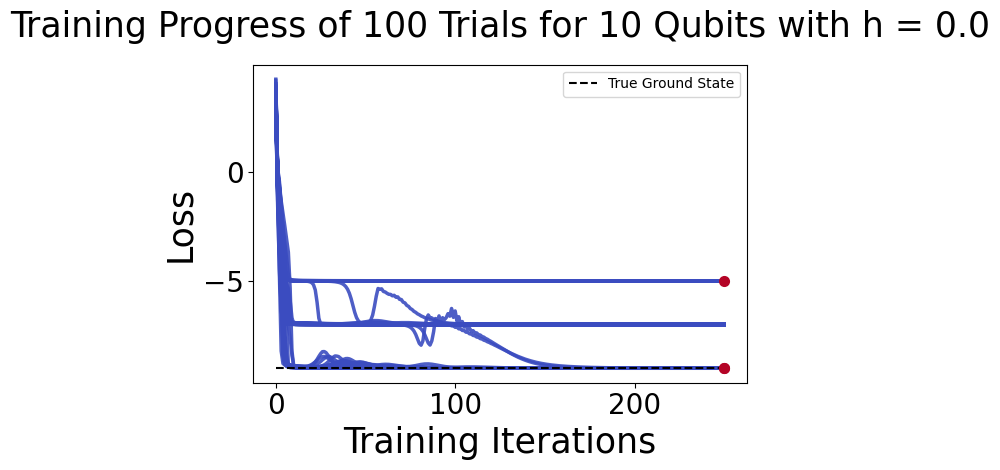

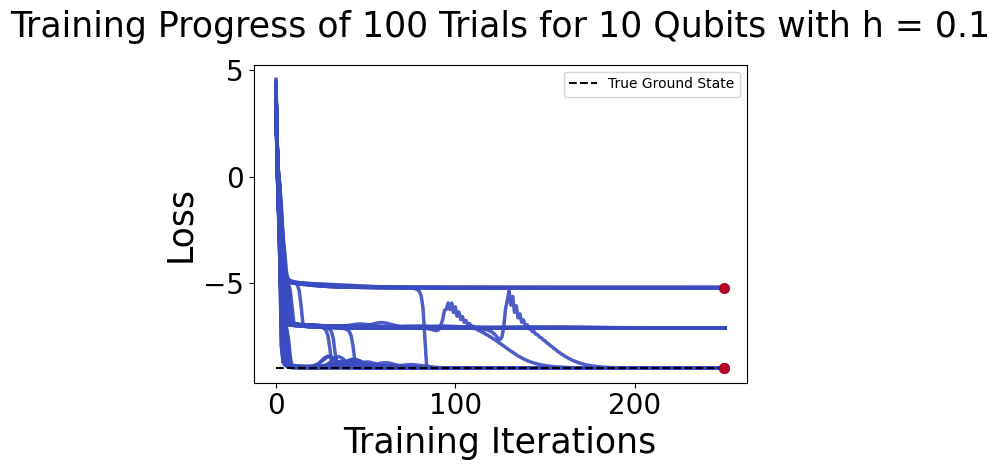

In [104]:
%%time

for problem in vqe_problems:

    n_qubits = problem['qubits']
    # depth = problem['depth']
    transverse_field_coefficient = problem['transverse_field_coefficient']

    qubits_folder = results_path + f'{n_qubits} qubits/'

    create_folder(qubits_folder)

    filename = qubits_folder + f'training_progress_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    fig, ax = plt.subplots()

    make_training_loss_plot(problem, ax)

    plt.tight_layout()

    plt.savefig(filename, bbox_inches="tight")
    # plt.show()


## Final Losses Histograms

In [105]:

def make_final_losses_histogram(problem, ax, show_spectrum = False):

    simulation_results = problem["simulation_results"]
    n_qubits = problem["qubits"]
    transverse_field_coefficient = problem["transverse_field_coefficient"]
    # epochs = problem["epochs"]
    trials = problem["trials"]
    loss_hamiltonian_spectrum = problem["loss_hamiltonian_spectrum"]

    all_costs_trajectories = simulation_results["all_costs_trajectories"]

    # fig, ax = plt.subplots()

    ax.hist(all_costs_trajectories[:,-1], bins=100, width=0.1, align="mid", color=plt.get_cmap("coolwarm", 7)(6), alpha=0.9)
    ax.set_title(f"Histogram of {trials} final losses for {n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Loss", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)


    if show_spectrum:
        spectrum_lines = np.unique(loss_hamiltonian_spectrum)
        for state in range(len(spectrum_lines)):

            line = spectrum_lines[state]

            if state == 0:
                # label = 'Ground State'
                label = 'Hamiltonian Spectrum'
            else:
                # label = f"{state} Excited State"
                label = ''

            ax.axvline(x = line, color = 'black', label = label, linestyle = ':', linewidth=1)

    # ax.set_xlim(loss_limits)

    ax.legend(loc='upper right')


Folder Cluster_Results/1D Ising Model Figures/3 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/3 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/4 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/4 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/5 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/5 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/6 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/6 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/7 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/7 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/8 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/8 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/9 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/9 qubits/ already exists
Folder

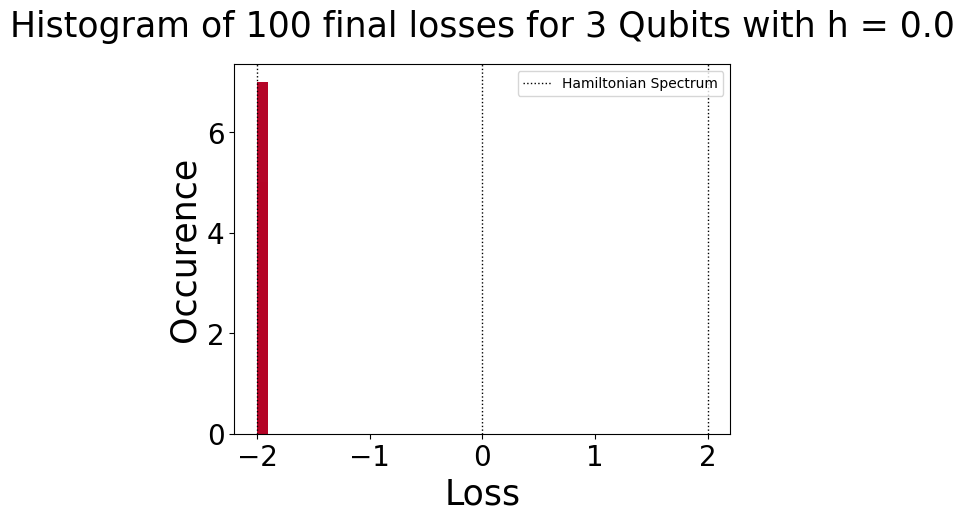

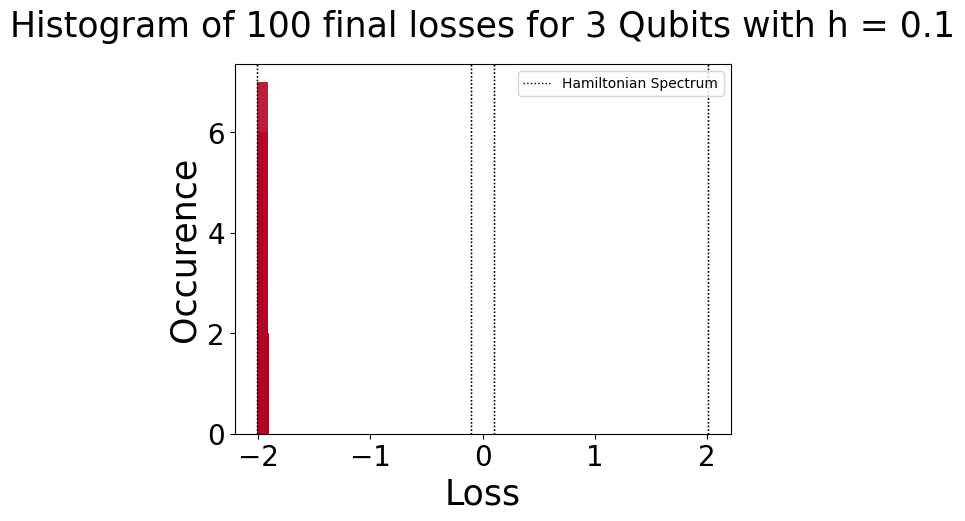

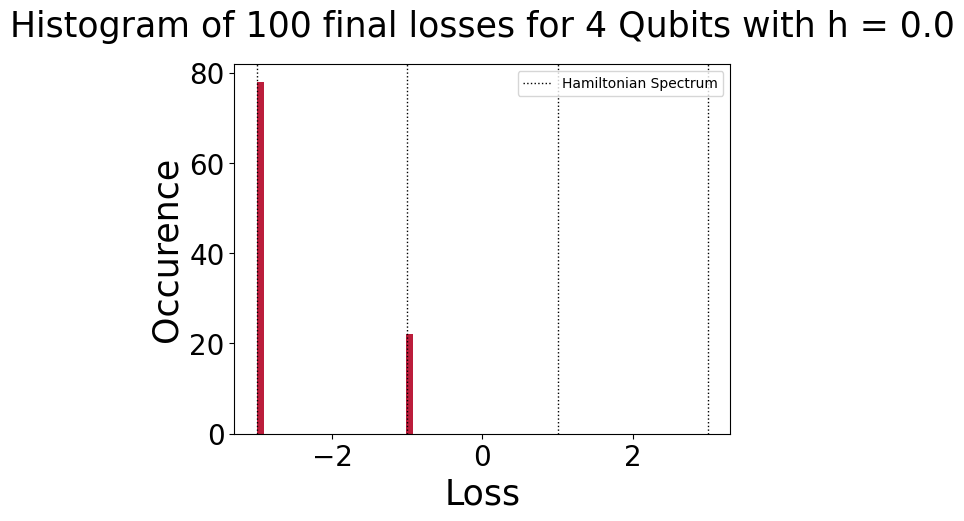

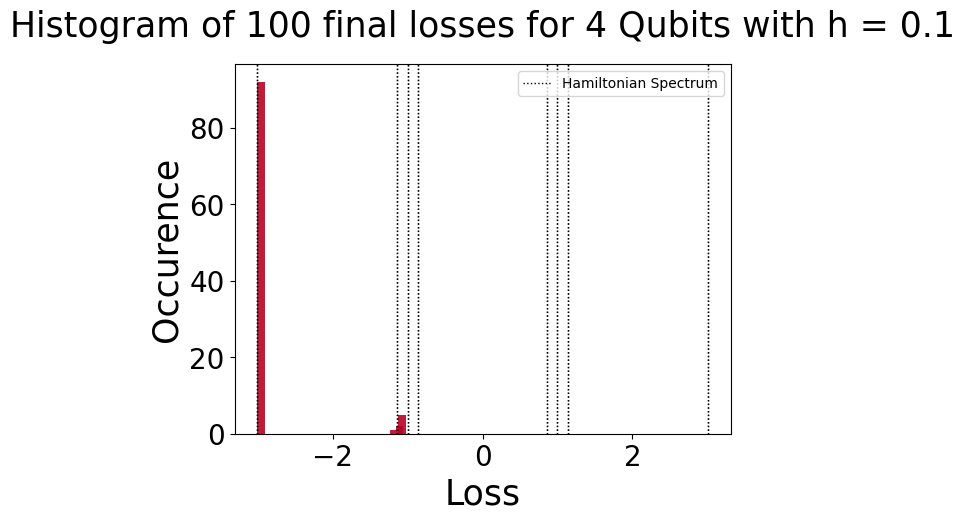

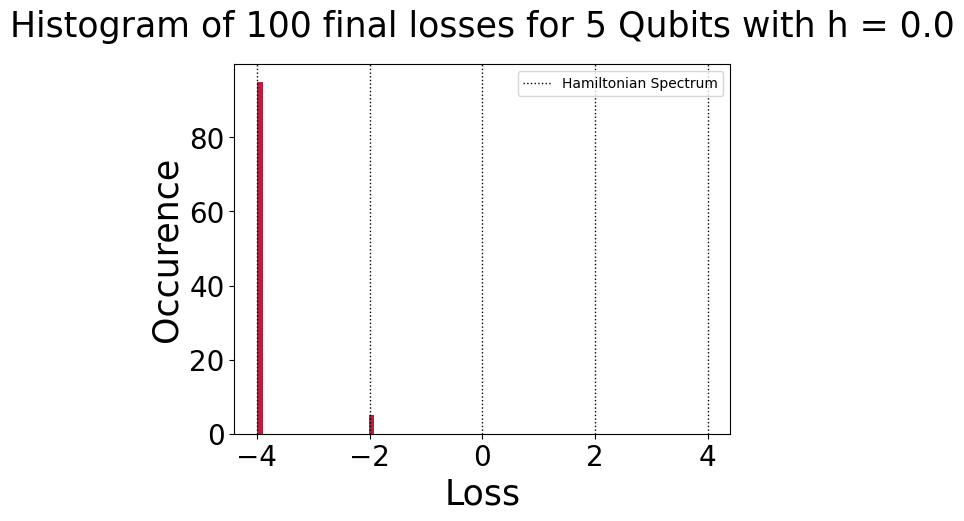

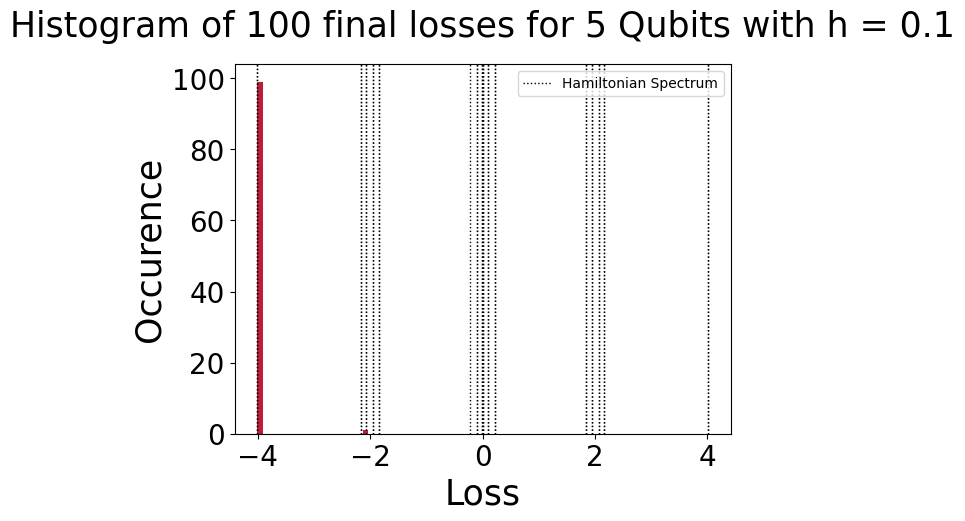

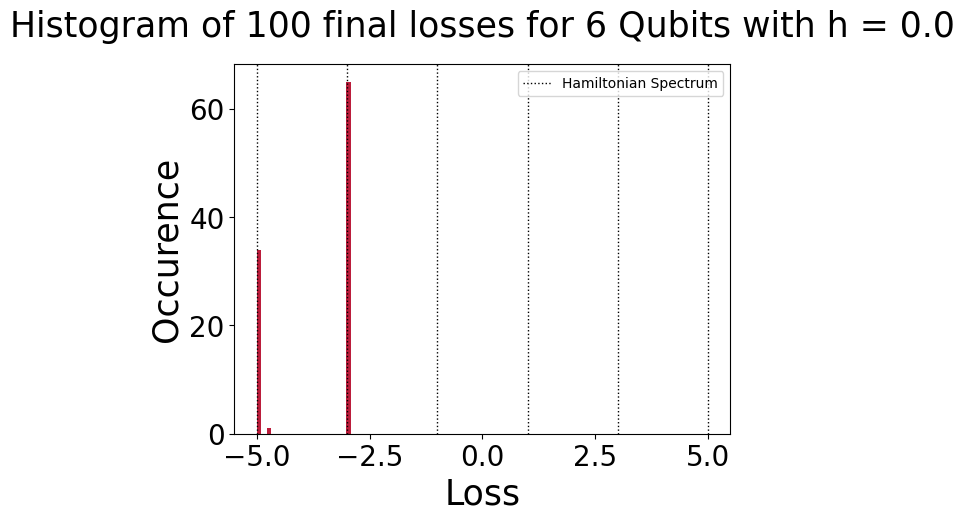

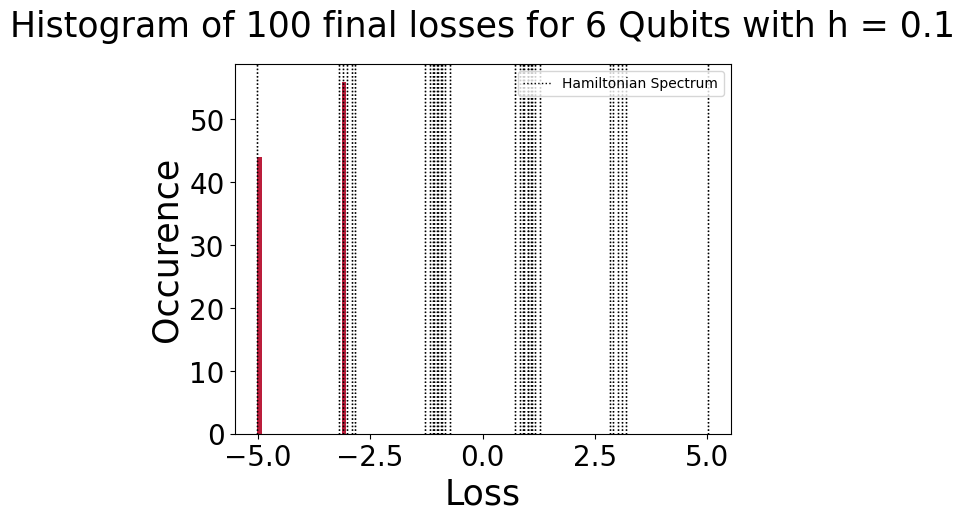

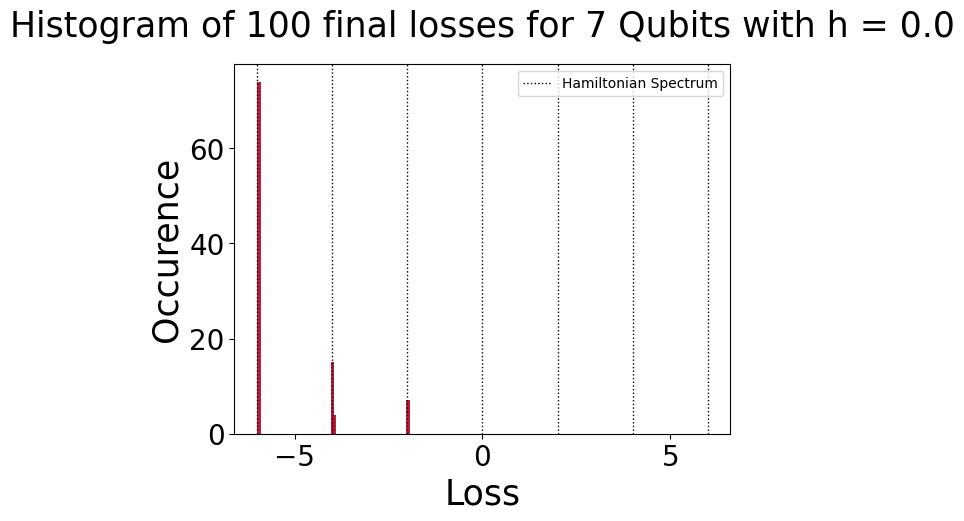

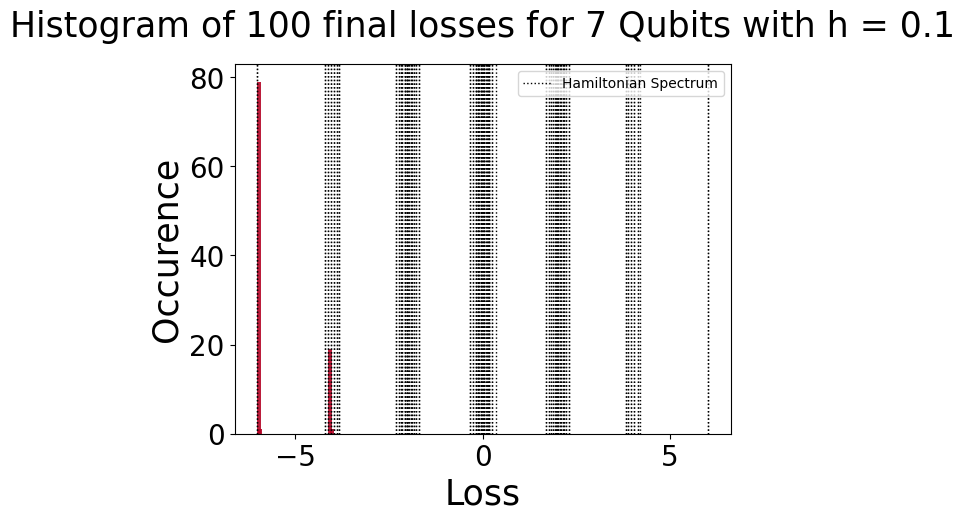

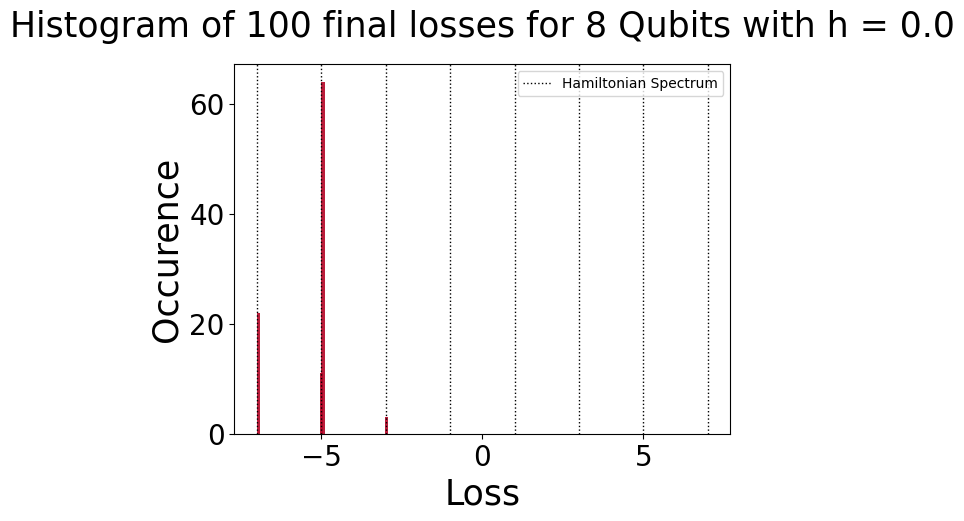

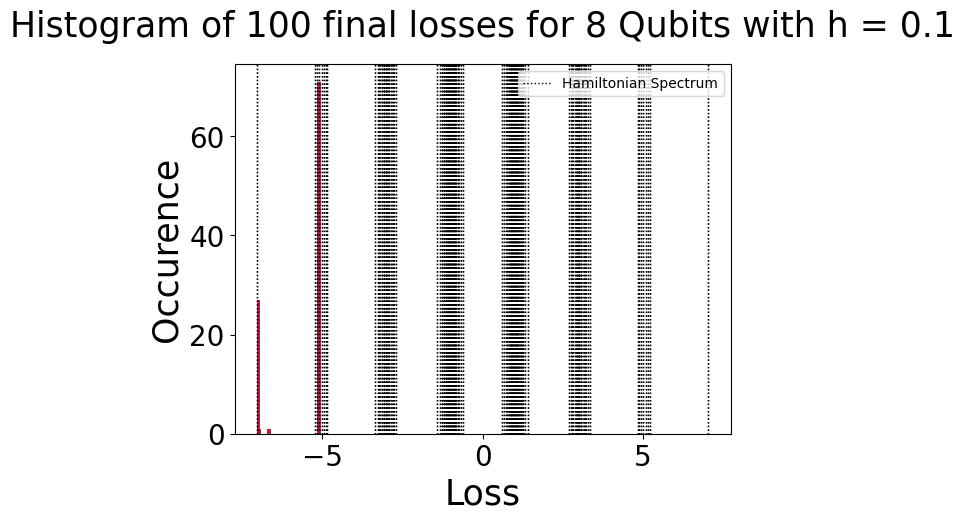

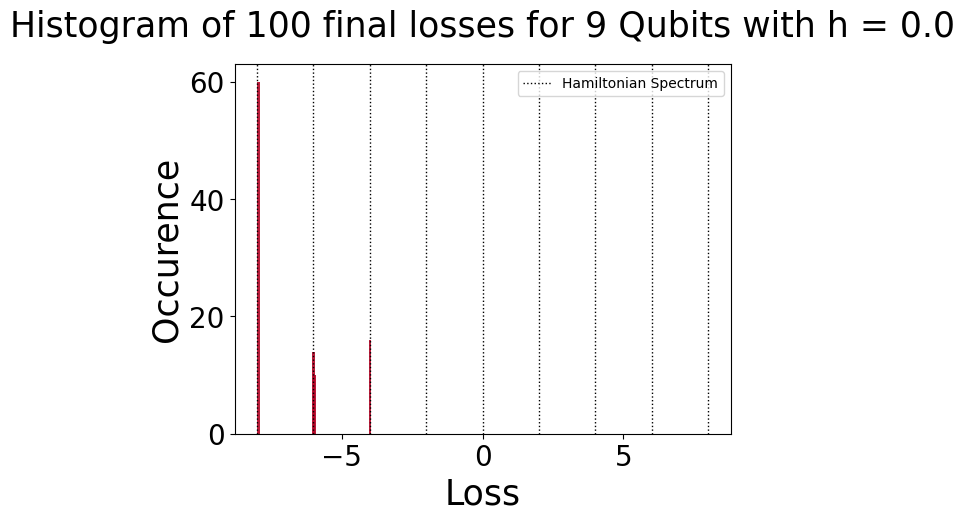

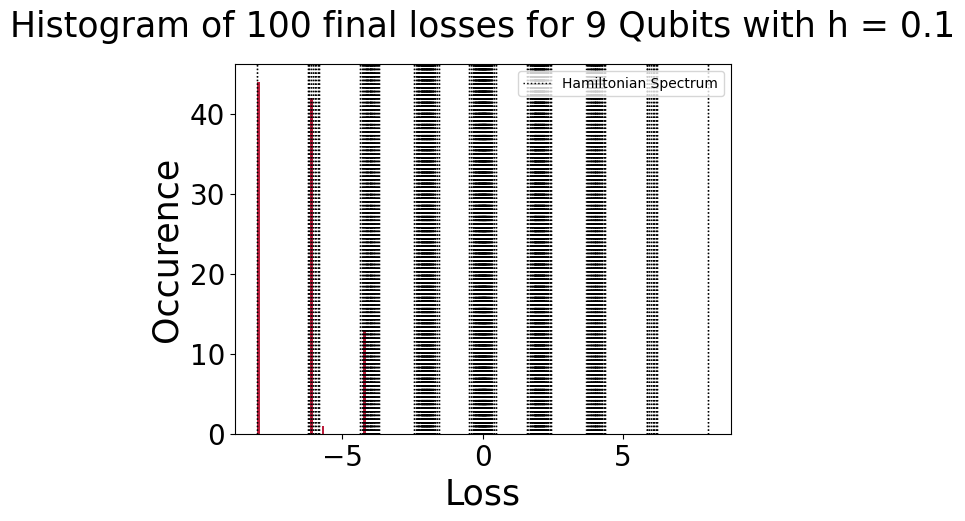

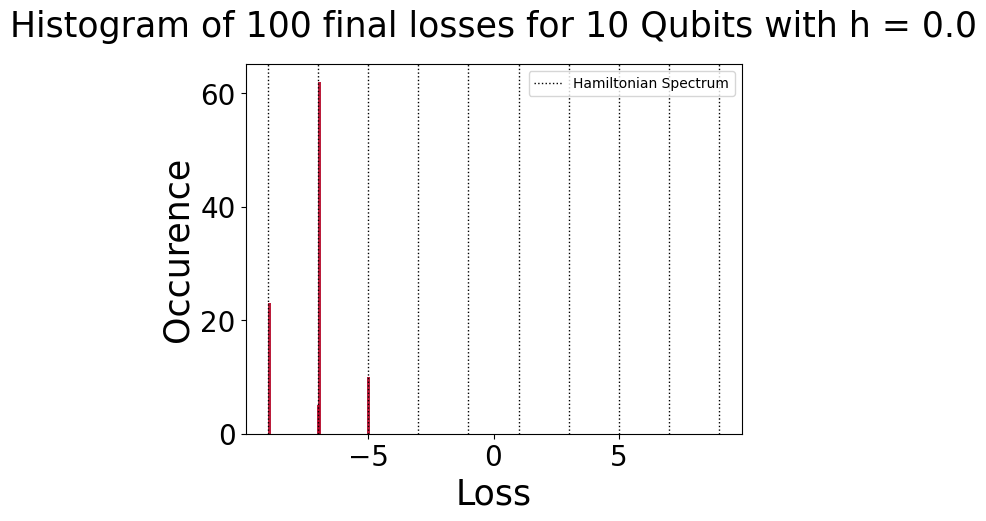

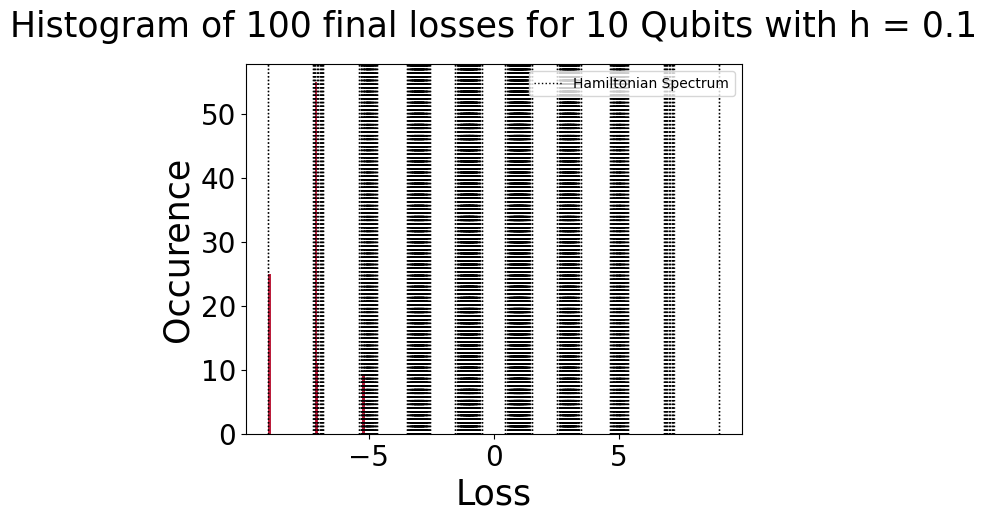

In [106]:
%%time

for problem in vqe_problems:

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    qubits_folder = results_path + f'{n_qubits} qubits/'

    create_folder(qubits_folder)

    filename = qubits_folder + f'final_losses_histograms_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    fig, ax = plt.subplots()

    make_final_losses_histogram(problem, ax, True)

    # plt.tight_layout()

    plt.savefig(filename, bbox_inches="tight")
    # plt.show()


## Gradient Inspection

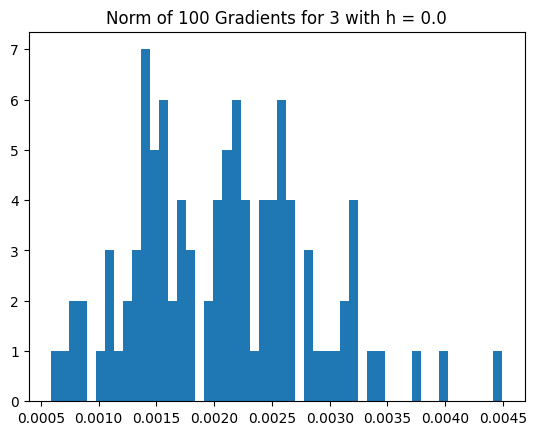

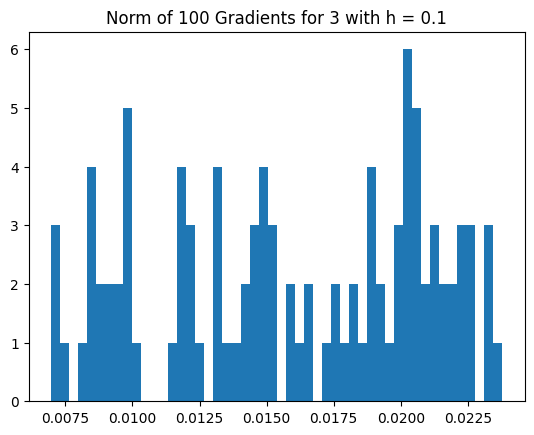

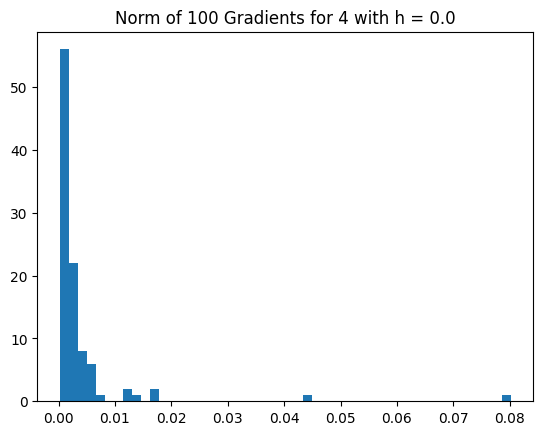

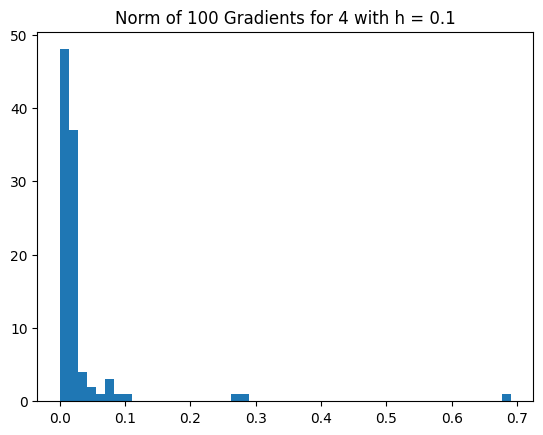

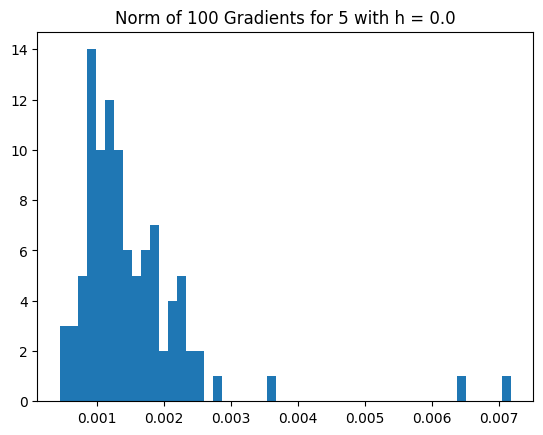

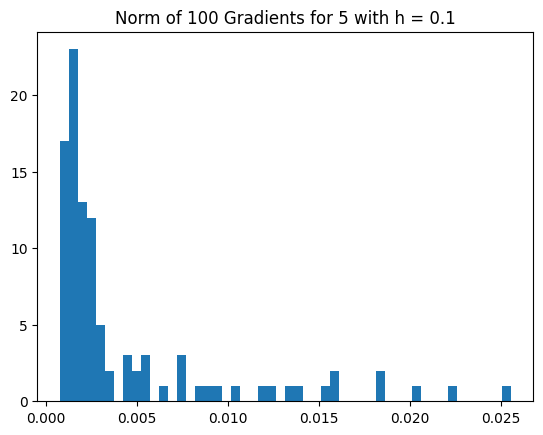

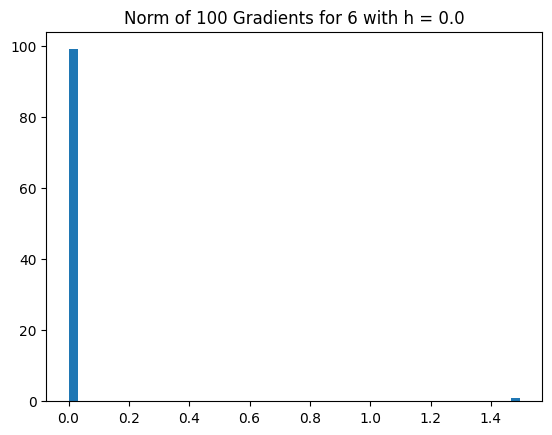

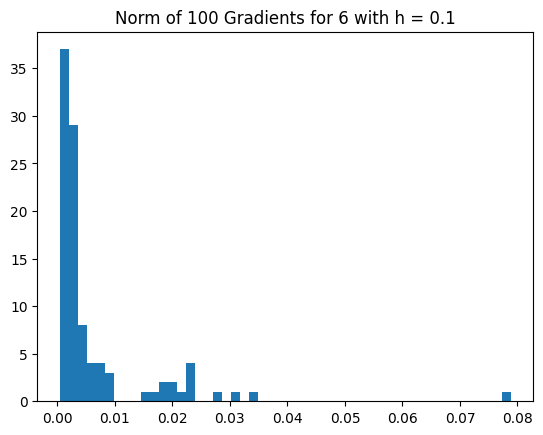

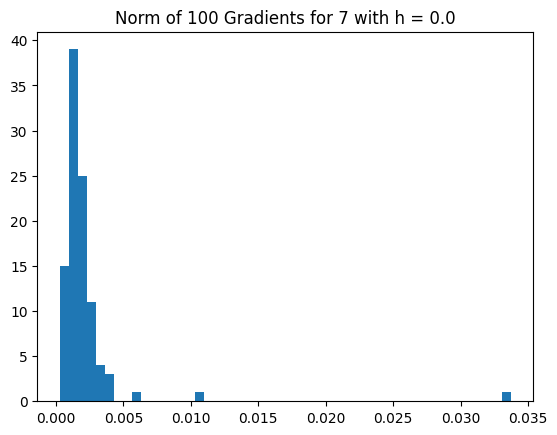

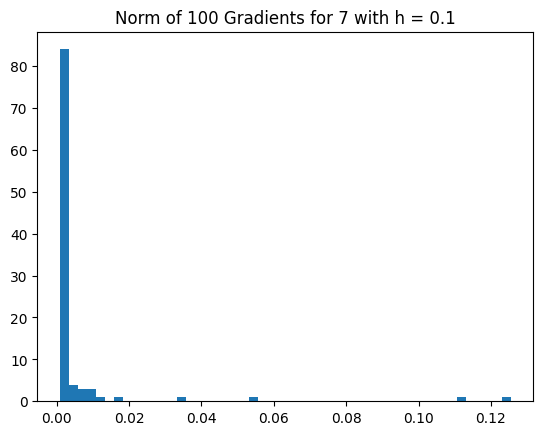

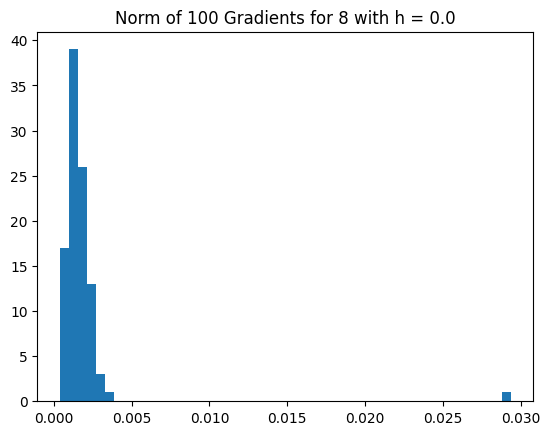

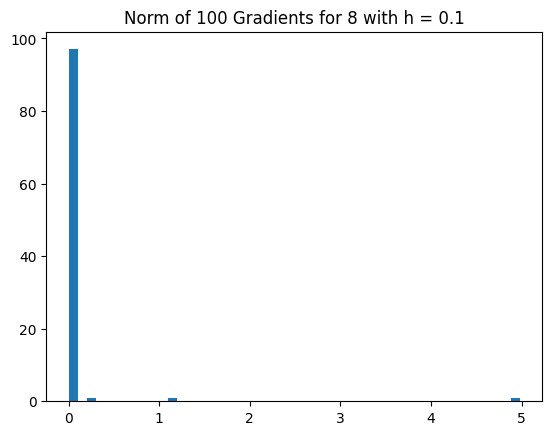

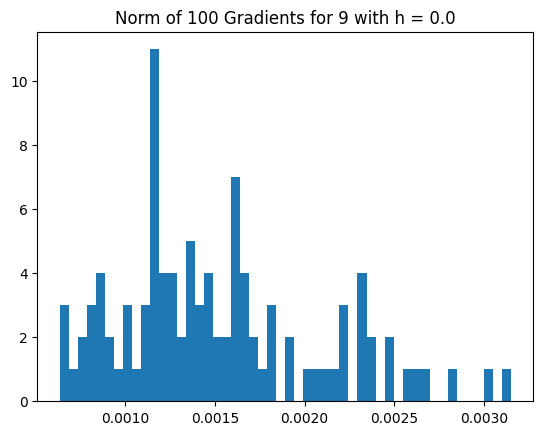

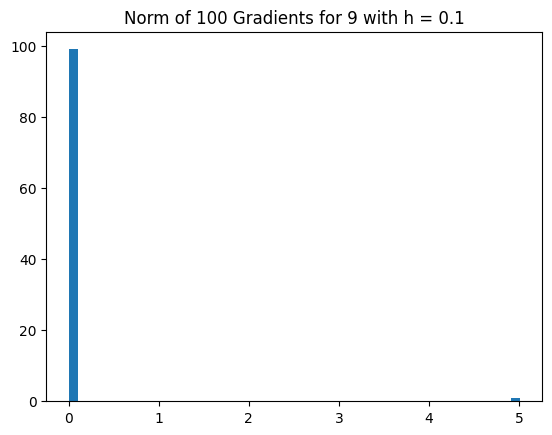

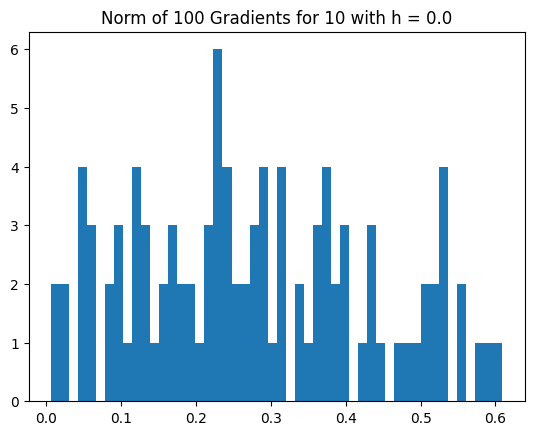

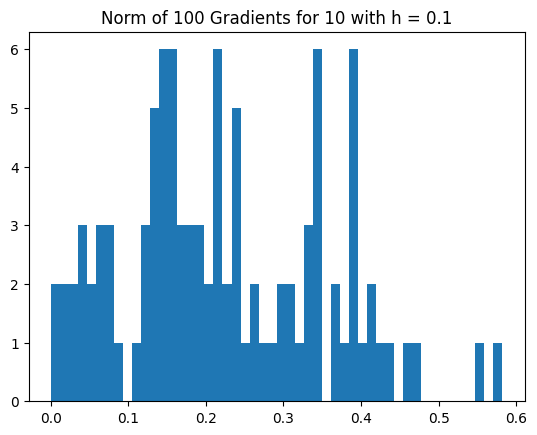

In [107]:
import torch

for problem in vqe_problems:

    all_final_gradients = problem['simulation_results']['all_final_gradients']
    # all_final_gradients = [torch.cat((gradient['Js'].view(-1), gradient['vs'].view(-1))).detach().numpy() for gradient in all_final_gradients]
    # print(all_final_gradients)
    n_qubits = problem['qubits']
    transverse_field_coefficient = problem['transverse_field_coefficient']
    trials = problem['trials']

    gradient_norms = np.linalg.norm(all_final_gradients, axis = 1)

    # print(gradient_norms)
    plt.title(f'Norm of {trials} Gradients for {n_qubits} with h = {transverse_field_coefficient}')
    plt.hist(gradient_norms, bins=50, )
    # plt.xscale('log')
    plt.show()


## Hessian Analysis

### Inspecting the eigenvalues

In [108]:
for problem in vqe_problems:

    np.set_printoptions(linewidth=np.inf)

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    print(f'{n_qubits} Qubits with h = {transverse_field_coefficient}')

    simulation_results = problem['simulation_results']

    gs_energy = problem['loss_hamiltonian_spectrum'][0]

    hessians = simulation_results['all_final_hessians']
    hessian_determinants = simulation_results['all_final_hessian_determinants']

    all_final_costs = simulation_results['all_costs_trajectories'][:,-1]


    for trial_count in range(len(all_final_costs)):

        hessian = hessians[trial_count]
        determinant = hessian_determinants[trial_count]
        final_loss = all_final_costs[trial_count]

        # 'all_final_hessian_determinants': all_final_hessian_determinants,
        #     'all_final_hessians_eigenvalues': all_final_hessians_eigenvalues,
        #     'hessian_min_eigenvalues': hessian_min_eigenvalues,
        #     'hessian_max_eigenvalues': hessian_max_eigenvalues,
        #     'hessian_eigenvalues_ratio

        min_eigval = simulation_results['hessian_min_eigenvalues'][trial_count]

        max_eigval = simulation_results['hessian_max_eigenvalues'][trial_count]
        ratio = simulation_results['hessian_eigenvalues_ratio'][trial_count]

        print(f'Final loss: {final_loss} | True ground state: {gs_energy}')
        print(f'Hessian information: ')
        print(f'        Eigenvalue ratio: {ratio} | Minimum eigenvalue: {min_eigval} | Maximum eigenvalue: {max_eigval}')
        print(f'        Determinant: {determinant}')

        # trial_count += 1


3 Qubits with h = 0.0
Final loss: -1.9999941864305695 | True ground state: -2.0
Hessian information: 
        Eigenvalue ratio: -0.00014146023354121956 | Minimum eigenvalue: -0.0016864084399510493 | Maximum eigenvalue: 11.921431187653548
        Determinant: 0.0
Final loss: -1.9999870589067823 | True ground state: -2.0
Hessian information: 
        Eigenvalue ratio: -0.00031833272451484005 | Minimum eigenvalue: -0.0038036994864626664 | Maximum eigenvalue: 11.94881705064961
        Determinant: 0.0
Final loss: -1.9999842524214528 | True ground state: -2.0
Hessian information: 
        Eigenvalue ratio: -0.0003779559140848457 | Minimum eigenvalue: -0.004528357560157149 | Maximum eigenvalue: 11.981179262988322
        Determinant: 0.0
Final loss: -1.9999837559254277 | True ground state: -2.0
Hessian information: 
        Eigenvalue ratio: -0.00042276117217531926 | Minimum eigenvalue: -0.005011504328489438 | Maximum eigenvalue: 11.85422091319958
        Determinant: 0.0
Final loss: -1.9999

In [109]:
def make_minmax_eigval_plot(problem, ax):
    
    simulation_results = problem['simulation_results']
    n_qubits = problem['qubits']
    transverse_field_coefficient = problem['transverse_field_coefficient']
    epochs = problem['epochs']
    trials = problem['trials']
    gs_energy = np.amin(problem['loss_hamiltonian_spectrum'])

    all_costs_trajectories = simulation_results['all_costs_trajectories']

    # fig, ax = plt.subplots()

    eigvals_min = simulation_results['hessian_min_eigenvalues']
    eigvals_max = simulation_results['hessian_max_eigenvalues']
    trial_marks = [i+1 for i in range(len(eigvals_min))]

    ax.set_title(f"Hessian eigenvalues of {trials} trials for {n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize*1, pad=20)
    ax.set_ylabel("Eigenvalues", fontsize=label_fontsize)
    ax.set_xlabel("Trial", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)
    # plt.ylim(loss_limits)
    # ax.plot(range(len(all_costs_trajectories[0])), [gs_energy]*len(all_costs_trajectories[0]), linestyle="dashed", color="black", label="Exact Solution")
    # ax.scatter(trial_marks, eigvals_min, color=plt.get_cmap("coolwarm", 7)(6), linewidth=2, zorder=3)
    # ax.scatter(trial_marks, eigvals_max, color=plt.get_cmap("coolwarm", 7)(6), linewidth=2, zorder=3)

    ax.scatter(trial_marks, eigvals_min, c = 'skyblue', label = 'minimum eigenvalues')
    ax.scatter(trial_marks, eigvals_max, c = [(240/255, 197/255, 105/255)], label = 'maximum eigenvalues')

    # plt.annotate("gr", xy=(epochs-10,0))

    ax.legend()

Folder Cluster_Results/1D Ising Model Figures/3 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/3 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/4 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/4 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/5 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/5 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/6 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/6 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/7 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/7 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/8 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/8 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/9 qubits/ already exists
Folder Cluster_Results/1D Ising Model Figures/9 qubits/ already exists
Folder

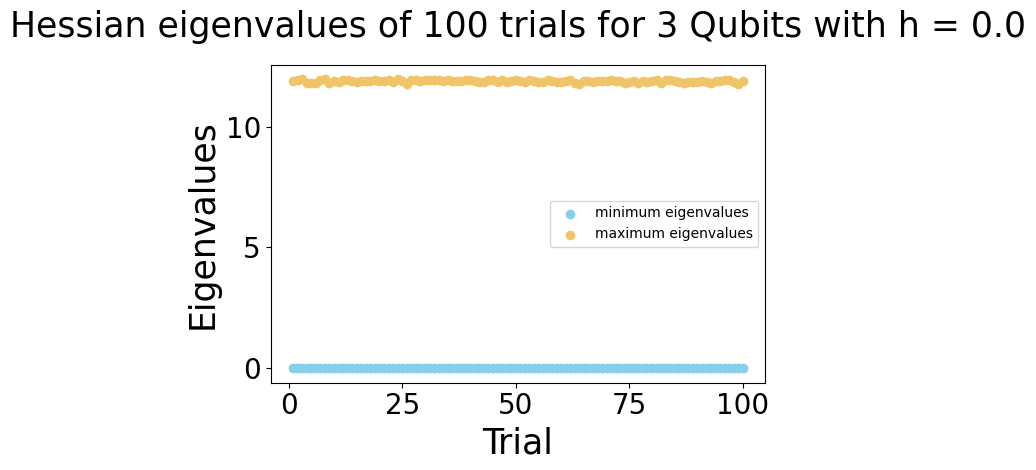

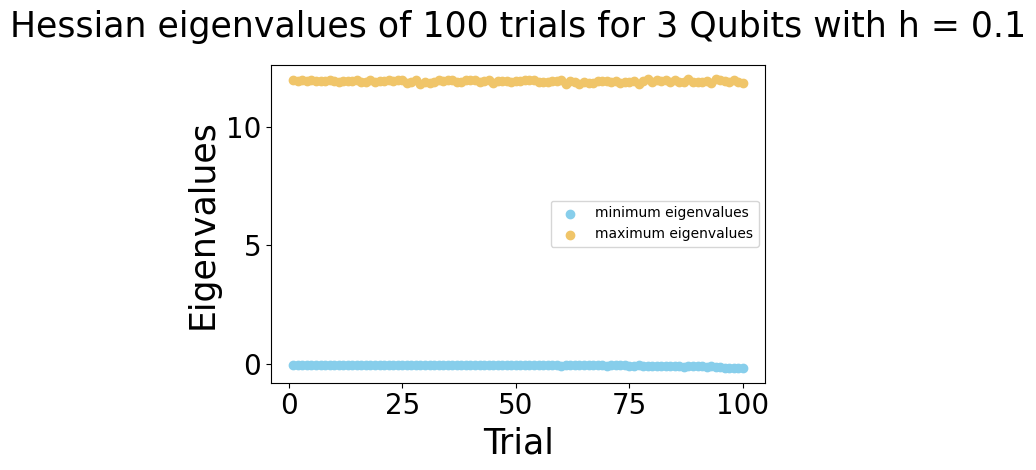

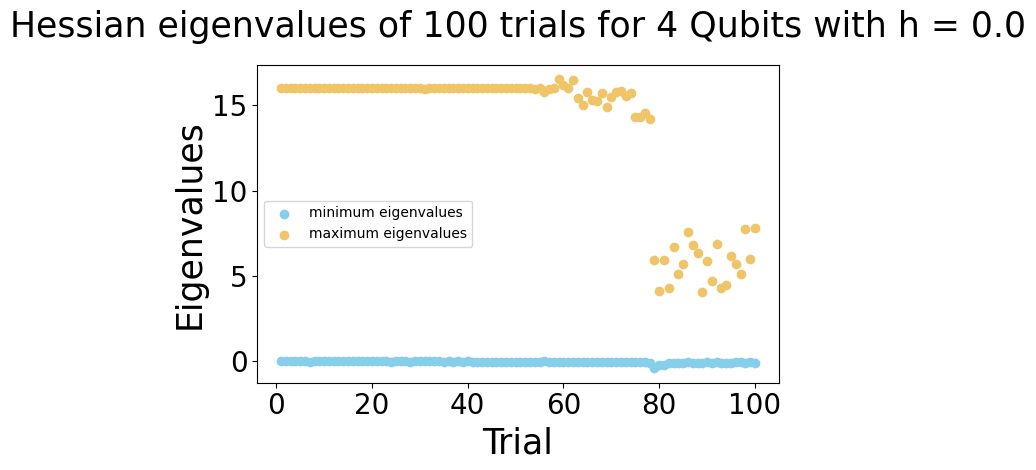

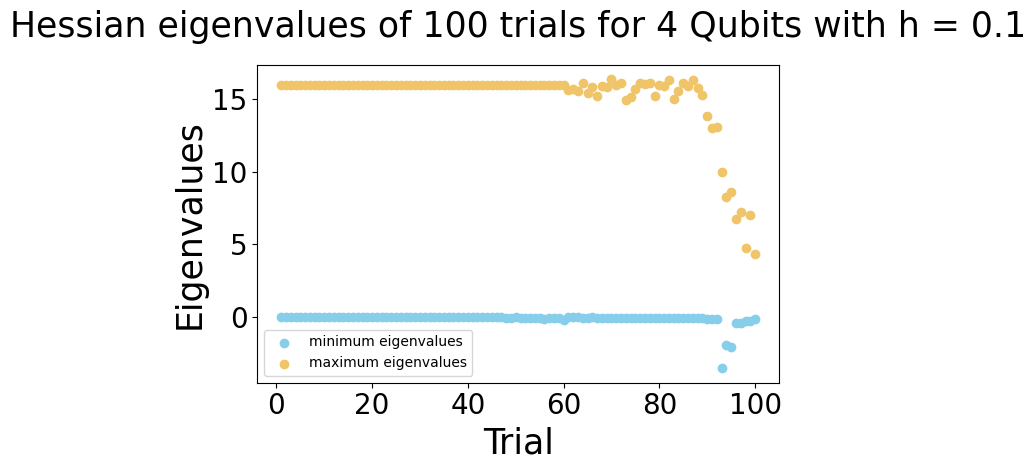

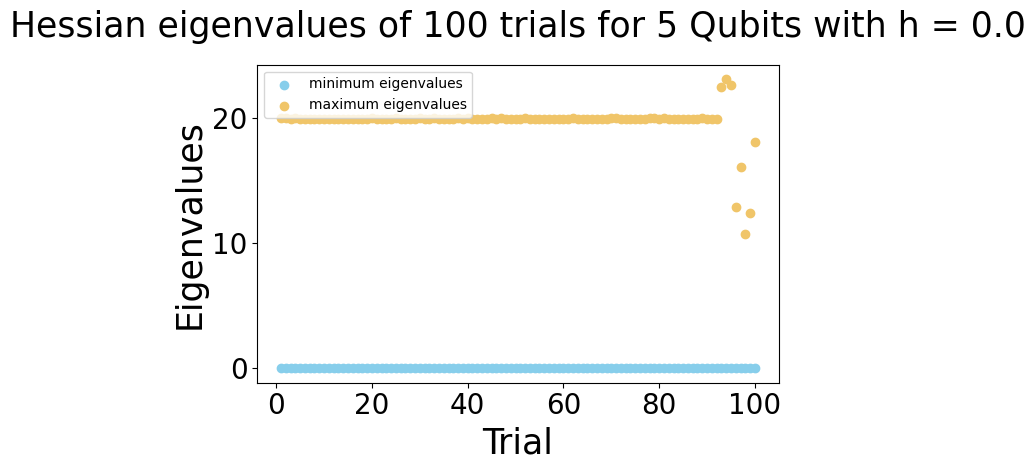

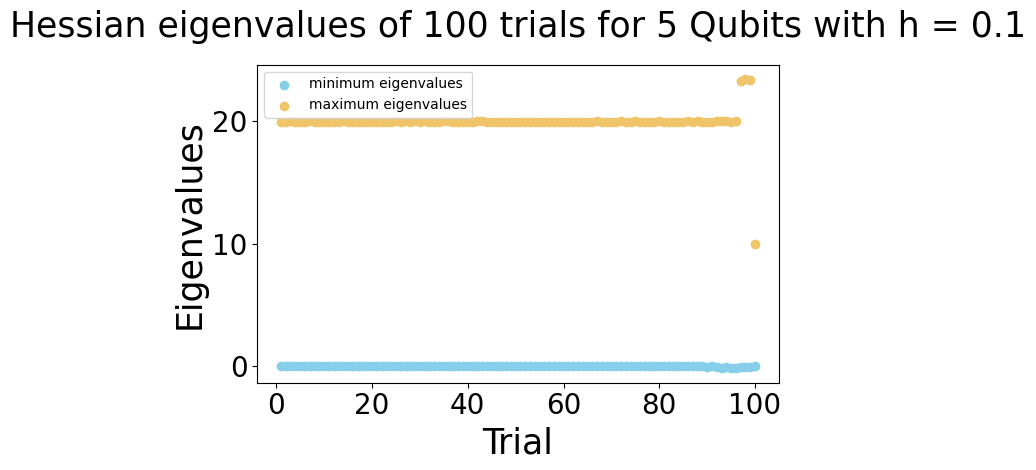

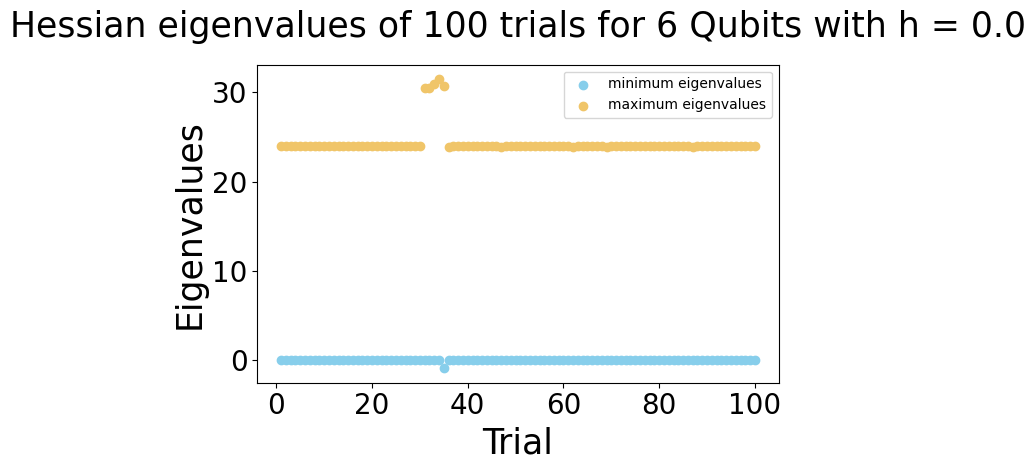

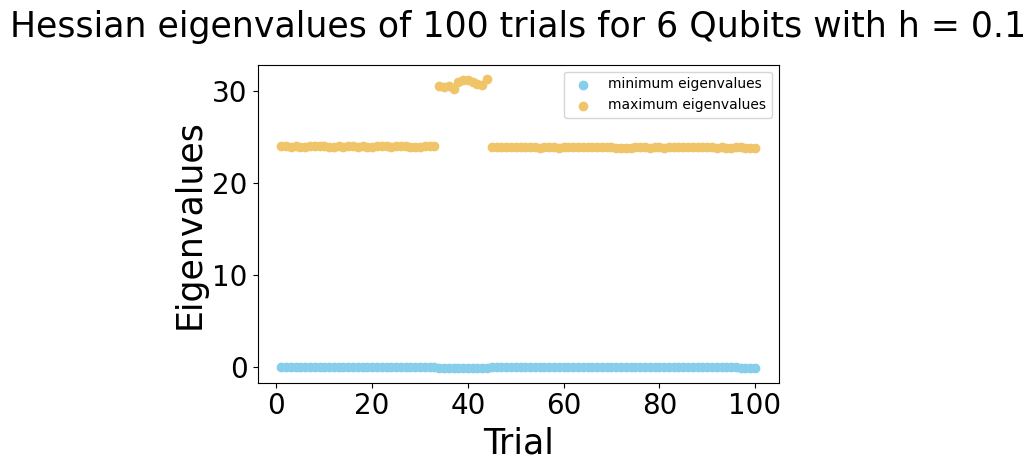

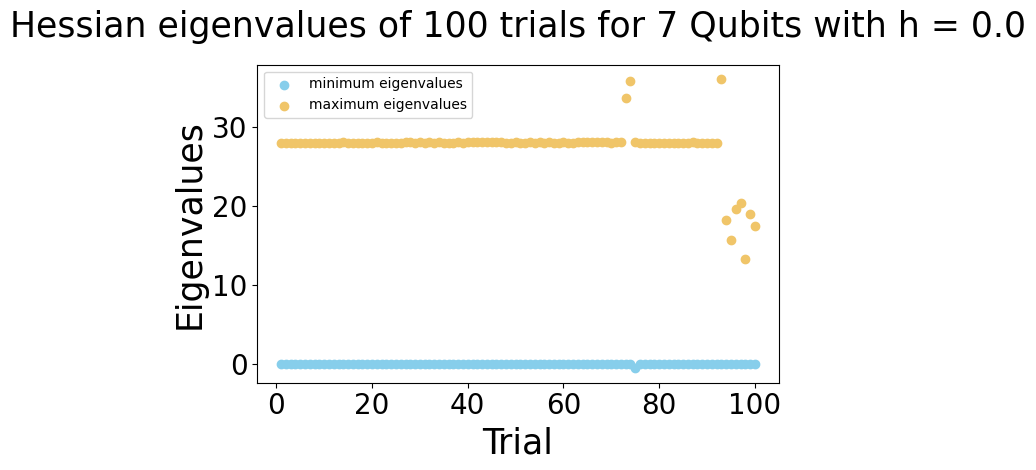

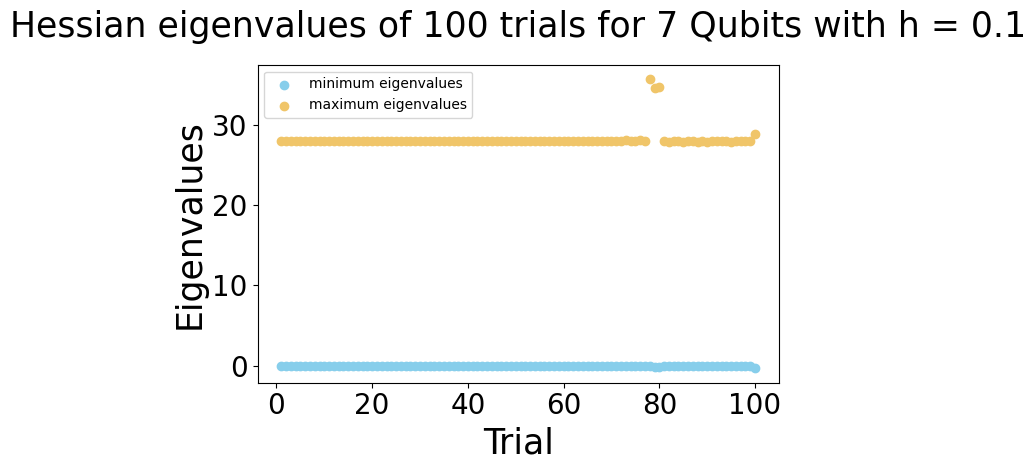

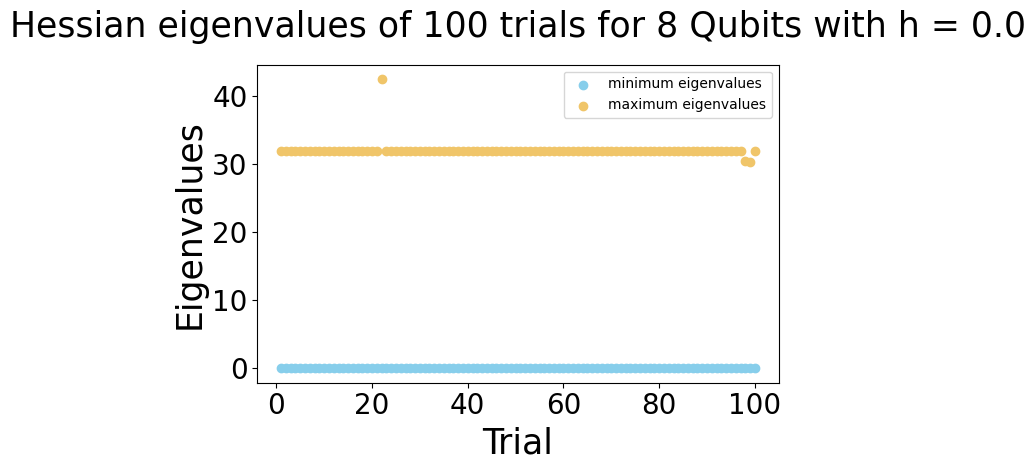

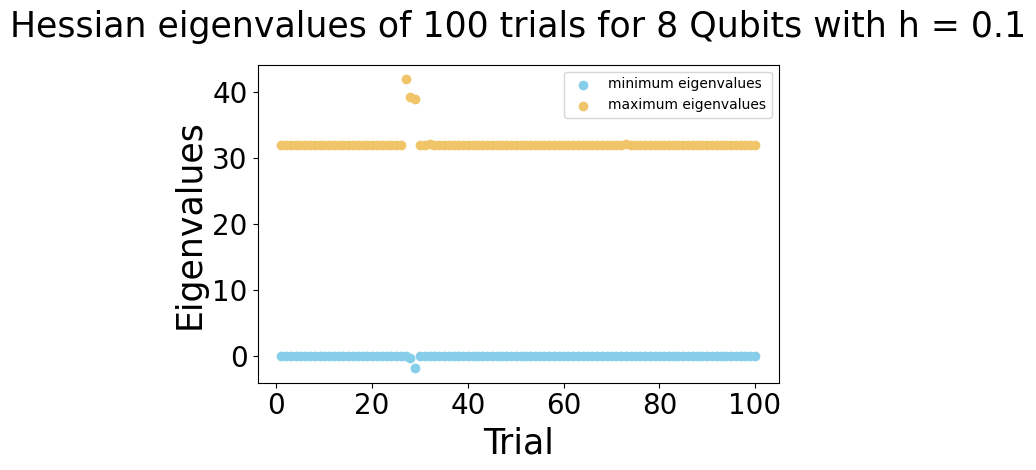

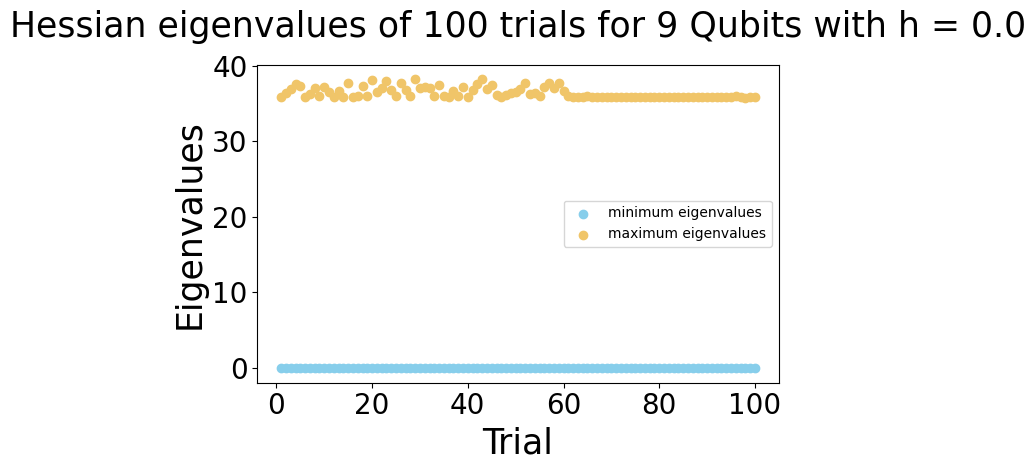

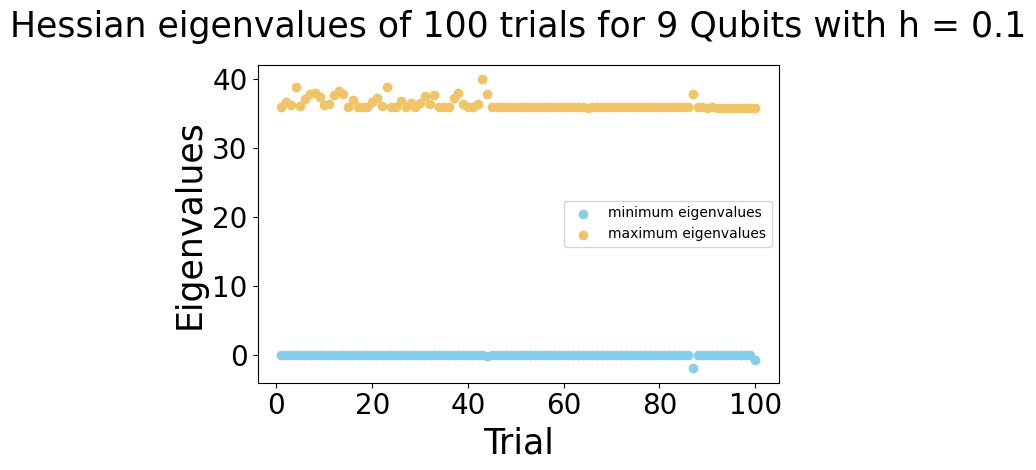

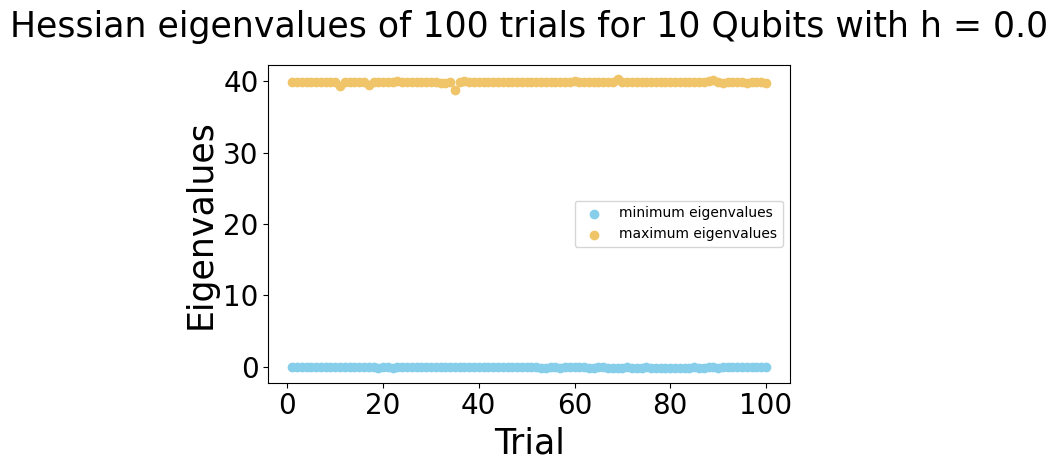

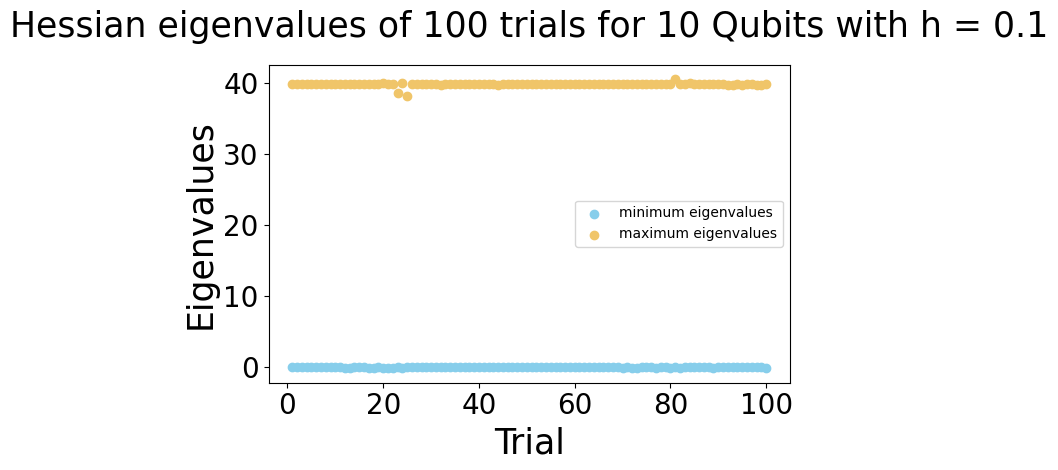

In [110]:
%%time

for problem in vqe_problems:

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    qubits_folder = results_path + f'{n_qubits} qubits/'

    create_folder(qubits_folder)

    filename = qubits_folder + f'minmax_hessian_eigenvalues_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    fig, ax = plt.subplots()

    make_minmax_eigval_plot(problem, ax)

    plt.tight_layout()

    plt.savefig(filename, bbox_inches="tight")
    # plt.show()

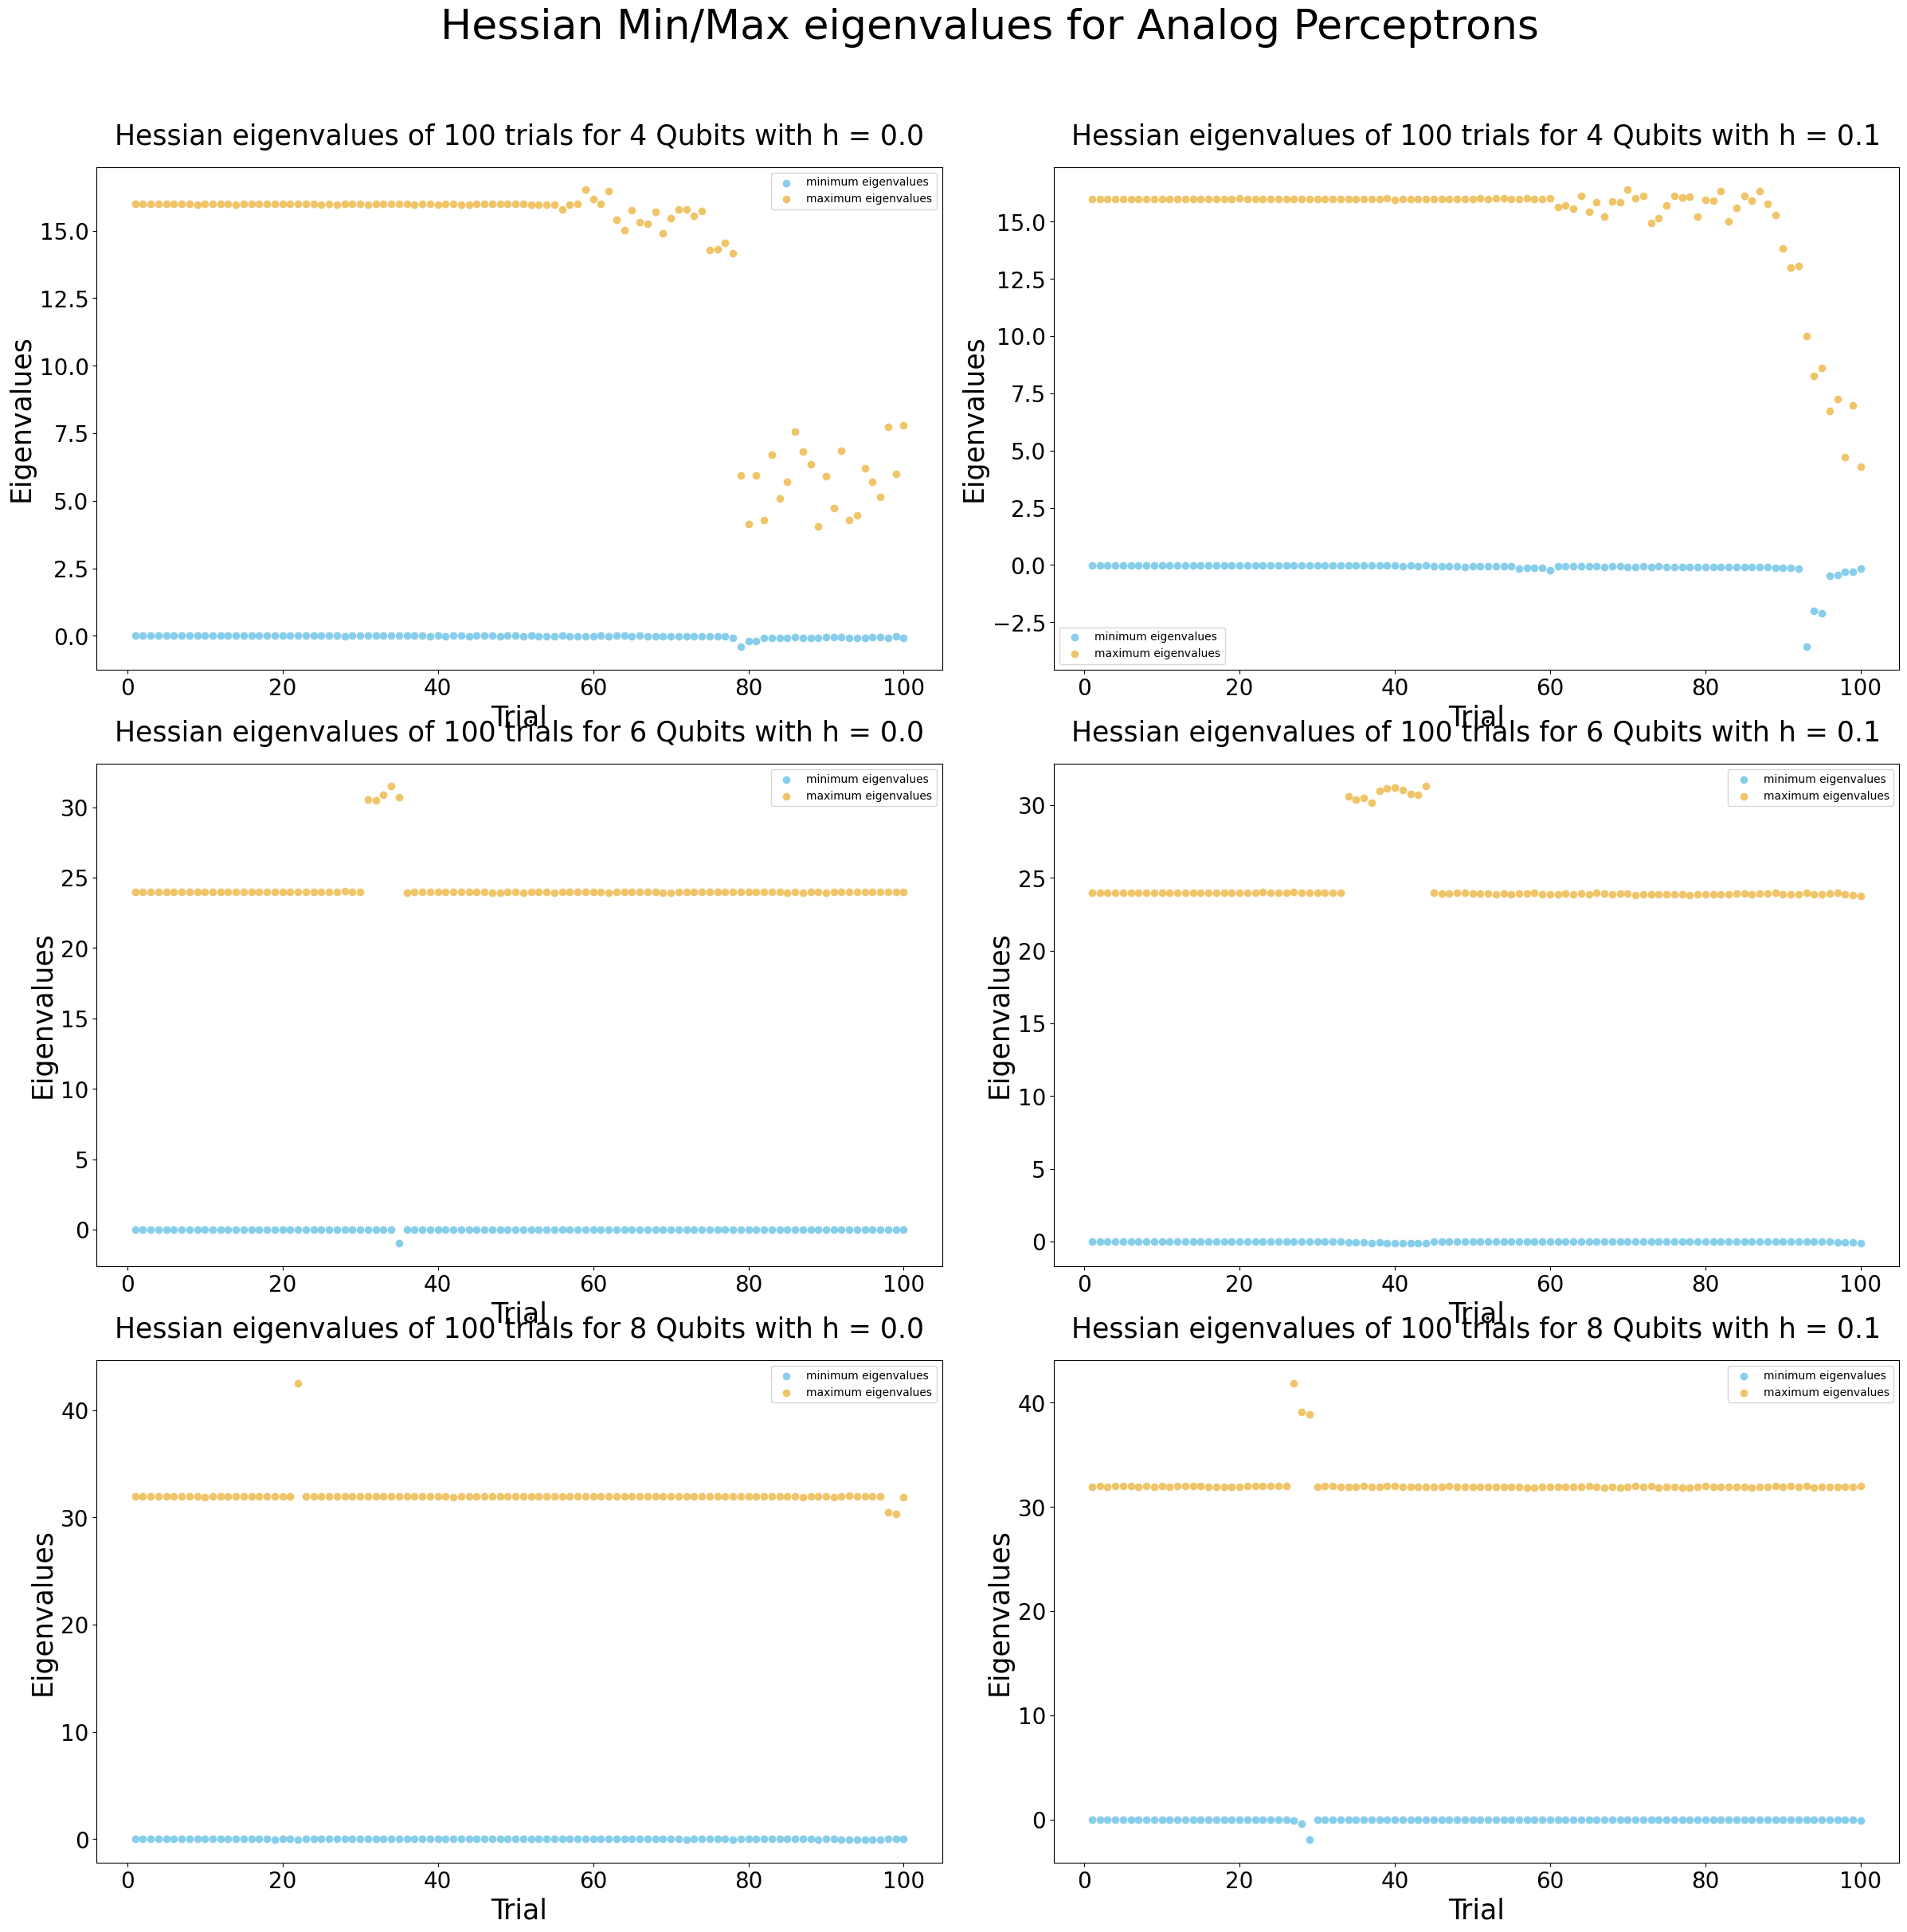

In [111]:
# Same plot but as a Mosaic

MOSAIC = """
        CD
        GH
        KL
        """

        # AB
        # MN
        # OP

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '7_0.0': 'I',
    '7_0.1': 'J',
    '8_0.0': 'K',
    '8_0.1': 'L',
    '9_0.0': 'M',
    '9_0.1': 'N',
    '10_0.0': 'O',
    '10_0.1': 'P',
}



fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(25,25))

fig.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    try:
        key = f'{n_qubits}_{transverse_field_coefficient}'
        ax_key = ax_mapping[key]
        # print(key)

        ax = ax_dict[ax_key]

        ax.set_title(f"{n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize*1, pad=20)

        make_minmax_eigval_plot(problem, ax)

    except:
        continue



fig.suptitle(f"Hessian Min/Max eigenvalues for Analog Perceptrons", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)


filename = results_path + '/' +  f'minmax_hessian_eigenvalues_{n_qubits}qubits_{transverse_field_coefficient}transverse_field_MOSAIC.pdf'


# plt.tight_layout()

plt.savefig(filename, bbox_inches="tight")
# plt.show()

In [112]:
# Extractign Hessian data for poster figures:


hessian_plots_dict = {}

for problem in vqe_problems:

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    key = f'{n_qubits}_{transverse_field_coefficient}'

    simulation_results = problem['simulation_results']

    eigvals_min = simulation_results['hessian_min_eigenvalues']
    eigvals_max = simulation_results['hessian_max_eigenvalues']
    trial_marks = [i+1 for i in range(len(eigvals_min))]

    hessian_plots_dict[key] = (eigvals_min, eigvals_max, np.asarray(trial_marks))

hessian_plots_dict

{'3_0.0': (array([-0.00168641, -0.0038037 , -0.00452836, -0.0050115 , -0.00385769, -0.00398123, -0.00653746, -0.00499364, -0.00482291, -0.00369067, -0.00411863, -0.00698809, -0.00574321, -0.01026779, -0.00533253, -0.0062511 , -0.00554193, -0.00672251, -0.00716447, -0.00619189, -0.0057512 , -0.00752173, -0.00519145, -0.00588038, -0.00676002, -0.00394647, -0.00777931, -0.00796787, -0.00589097, -0.00900209, -0.00780458, -0.00838125, -0.00958379, -0.00836895, -0.0095744 , -0.00757725, -0.00747536, -0.0091536 , -0.01066653, -0.01046744, -0.00859016, -0.00747455, -0.00787617, -0.01007331, -0.01056893, -0.00620026, -0.0092447 , -0.00800222, -0.00955593, -0.00871191, -0.00753756, -0.00794793, -0.01129371, -0.00825924, -0.00707618, -0.00870302, -0.00986148, -0.00945943, -0.00829953, -0.01051168, -0.01121846, -0.01046493, -0.00808157, -0.00993717, -0.00993933, -0.01040473, -0.00844187, -0.00948507, -0.01161897, -0.01129866, -0.01283427, -0.01062306, -0.0117927 , -0.01079683, -0.00941104, -0.0100

## Distance Analysis

3 Qubits with h = 0.0:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
        -2.0 | frequency: 100
Real spectrum:
    [-2. -2.  0.  0.  0.  0.  2.  2.]
[-1.9999941864305695]
[100]
3 Qubits with h = 0.1:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
        -2.007 | frequency: 100
Real spectrum:
    [-2.00750458 -2.00750458 -0.09962617 -0.09962617  0.09962617  0.09962617  2.00750458  2.00750458]
[-2.0073006775707913]
[100]
4 Qubits with h = 0.0:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
        -3.0 | frequency: 77
    1 excited state:
        -2.994 | frequency: 1
    2 excited state:
        -1.003 | frequency: 1
    3 excited state:
        -1.001 | frequency: 21
Real spectrum:
    [-3. -3. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  3.  3.]
[-2.999999079778356, -2.9938108900386764, -1.0034441932896008, -1.0009808906797084]
[77, 1, 1, 21]
4 Qubits with h = 0.1:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
     

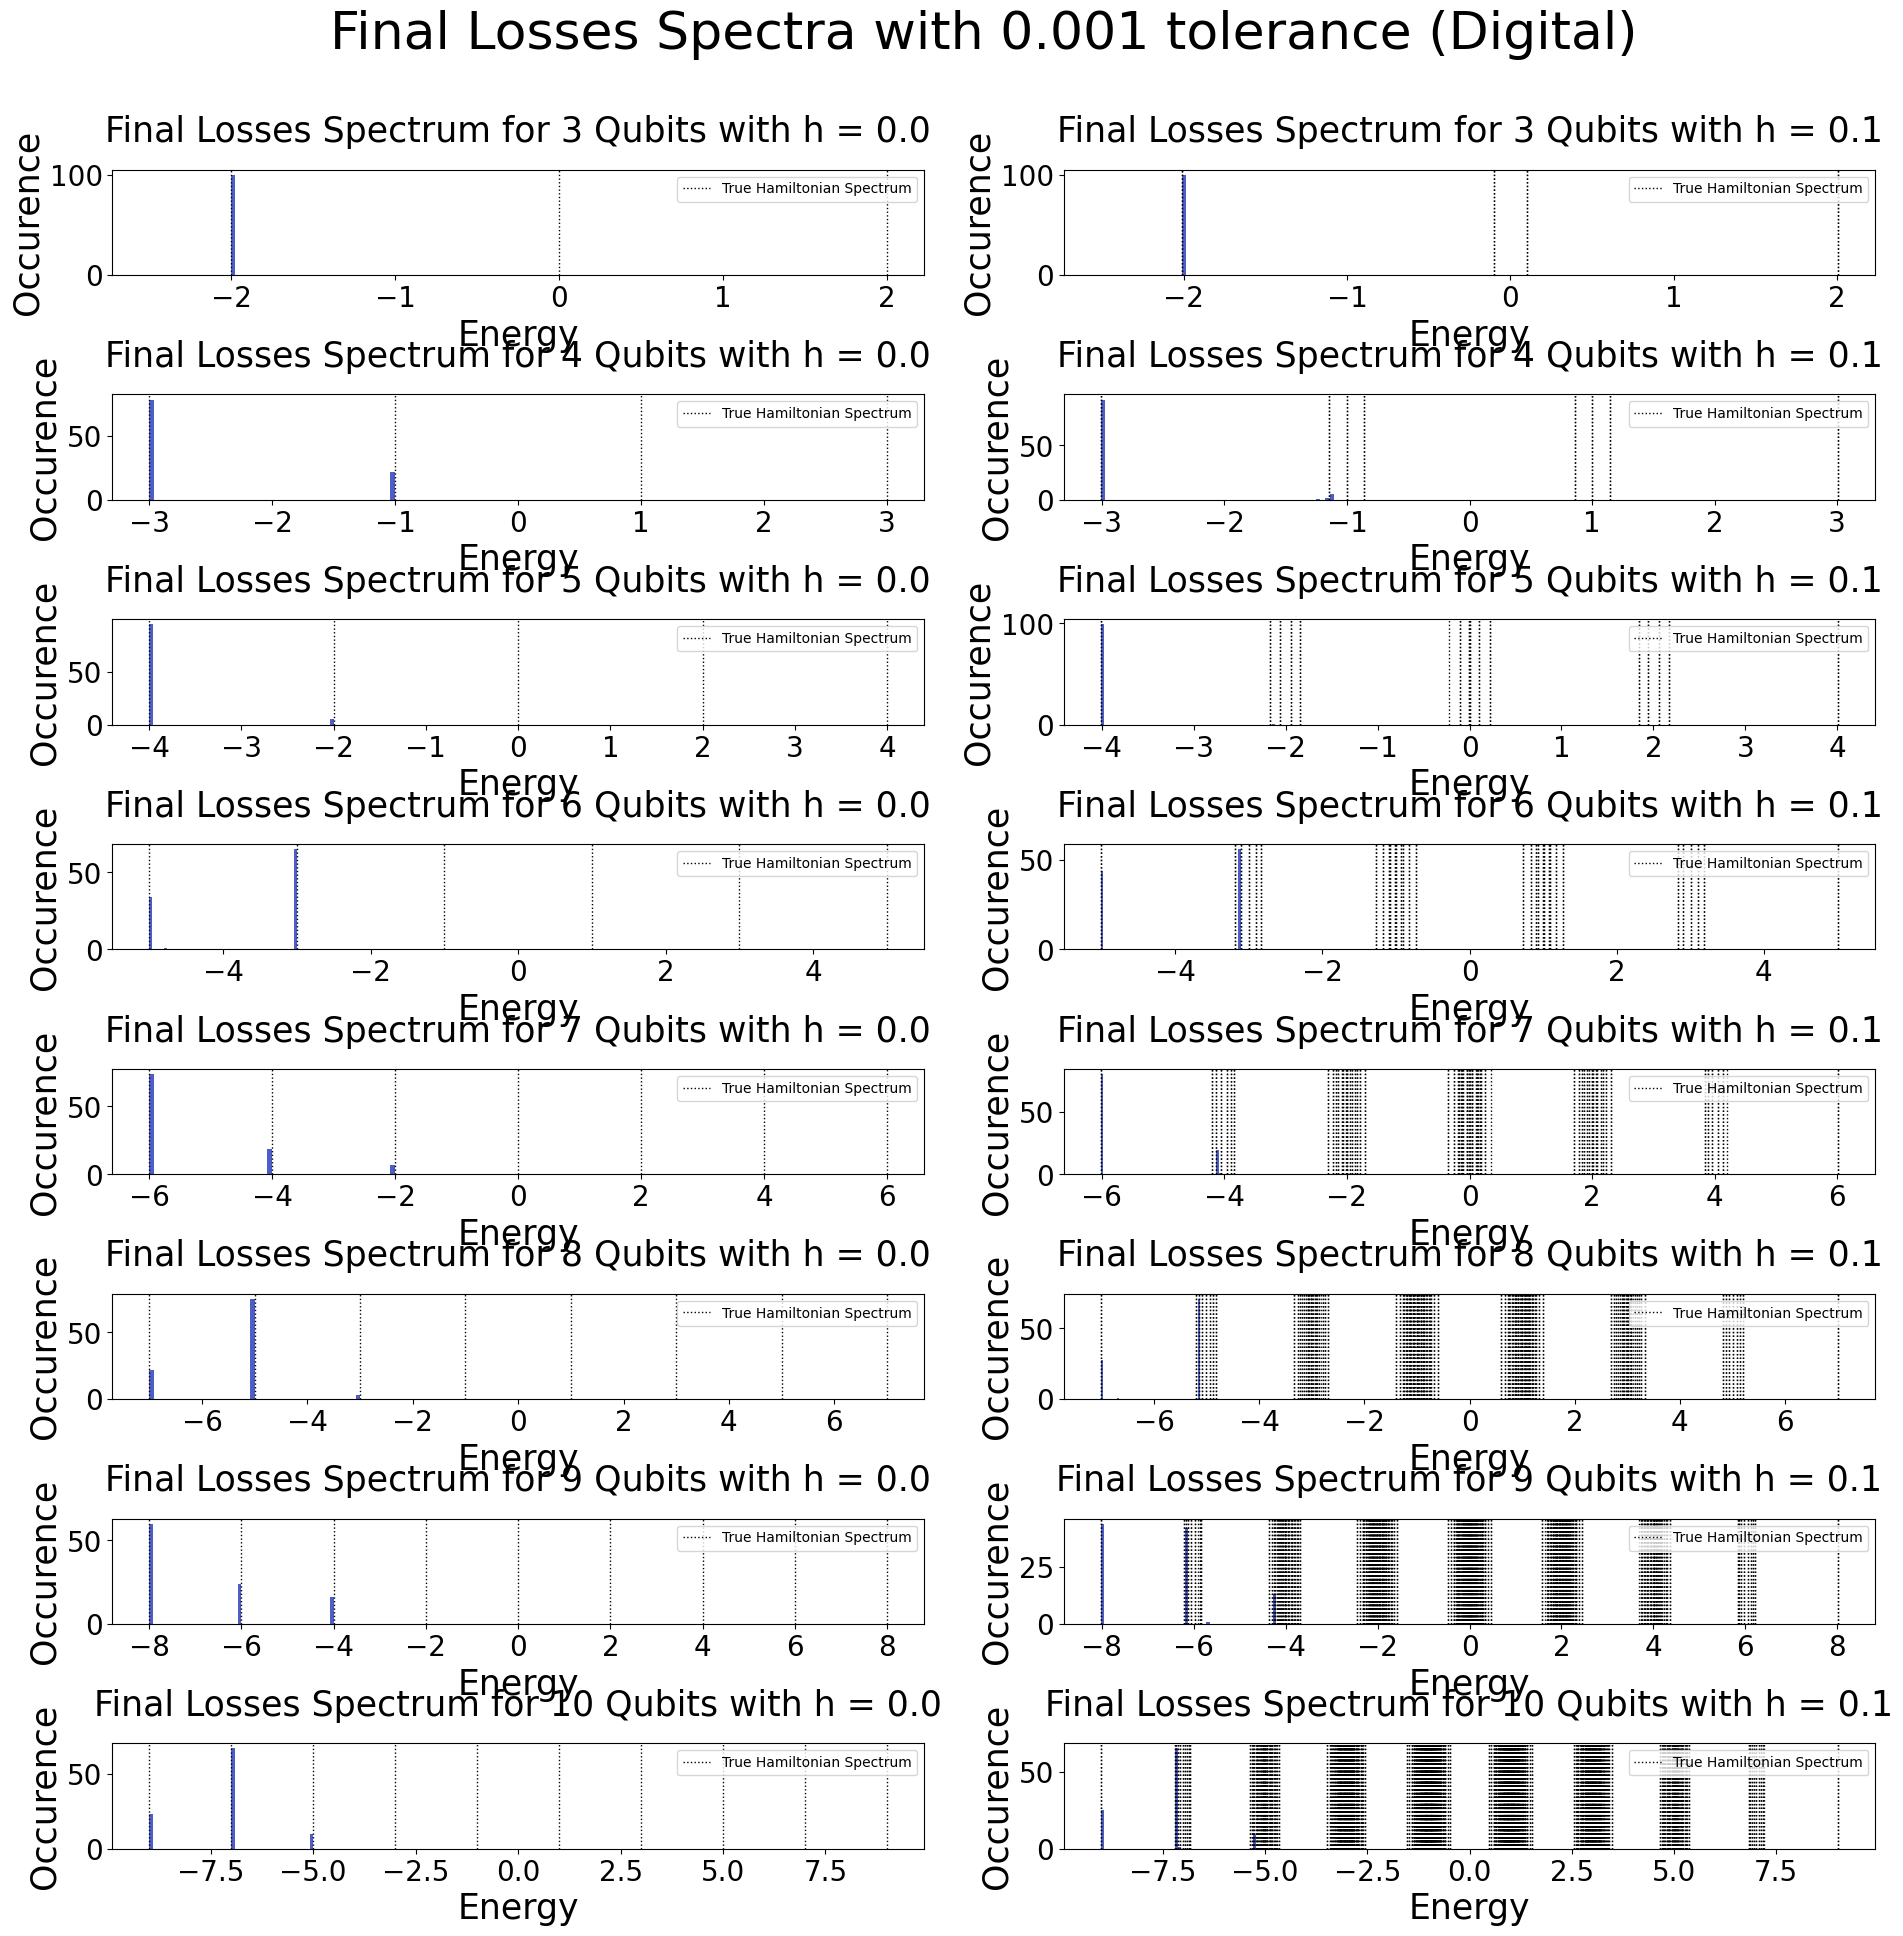

In [113]:
tolerance = 0.001

MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        KL
        MN
        OP
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '7_0.0': 'I',
    '7_0.1': 'J',
    '8_0.0': 'K',
    '8_0.1': 'L',
    '9_0.0': 'M',
    '9_0.1': 'N',
    '10_0.0': 'O',
    '10_0.1': 'P',
}


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']
    # depth = problem['depth']
    transverse_field_coefficient = problem['transverse_field_coefficient']

    print(f'{n_qubits} Qubits with h = {transverse_field_coefficient}:')

    simulation_results = problem['simulation_results']

    all_final_parameters = simulation_results['all_final_parameters']
    all_final_costs = simulation_results['all_costs_trajectories'][:,-1]
    all_parameters_trajectories = simulation_results['all_parameters_trajectories']

    # print(simulation_results.keys())

    parameters_dim = len(all_final_parameters[-1])
    trials = problem['trials']

    # print(parameters_dim)

    # print(all_final_costs)

    cuts = []

    for ii in range(trials-1):

        diff = all_final_costs[ii]-all_final_costs[ii+1]
        # print(f'{ii} vs {ii+1}:\n   {diff}')

        if np.abs(diff) > tolerance:
            cuts.append((ii, ii+1))

    # print(cuts)

    print(f'Found spectrum (given a {tolerance} tolerance)')

    split_cuts = [k[-1] for k in cuts]

    costs_split = np.split(all_final_costs, split_cuts)

    parameters_split = np.split(all_final_parameters, split_cuts)

    parameters_trajectories_split =np.split(all_parameters_trajectories, split_cuts)

    simulation_results['final_parameters_split'] = parameters_split

    spectrum_dict = {}

    energies = []
    frequencies = []

    for state in range(len(costs_split)):
        energy = np.mean(costs_split[state][0])
        frequency = len(costs_split[state])

        energies.append(energy)
        frequencies.append(frequency)

        print(f'    {state} excited state:\n        {round(energy,3)} | frequency: {frequency}')


        spectrum_dict[f'{state}_excited_state']= {
            'final_costs': costs_split[state],
            'mean_cost': energy,
            'frequency': frequency,
            'final_parameters': parameters_split[state],
            'parameter_trajectories': parameters_trajectories_split[state],
        }

    loss_hamiltonian_spectrum = problem['loss_hamiltonian_spectrum']
    print(f"Real spectrum:\n    {problem['loss_hamiltonian_spectrum']}")

    print(energies)
    print(frequencies)

    simulation_results['spectrum_dictionary'] = spectrum_dict

    # fig, ax = plt.subplots()


    key = f'{n_qubits}_{transverse_field_coefficient}'
    ax_key = ax_mapping[key]
    # print(key)
    ax = ax_dict[ax_key]

    # Plot the histogram
    ax.hist(energies, bins=50, weights=frequencies, align="mid", color=plt.get_cmap("coolwarm", 7)(0), alpha=0.9)

    ax.set_title(f"Final Losses Spectrum for {n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Energy", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)


    qubits_folder = results_path + f'{n_qubits} qubits/'

    # create_folder(qubits_folder)
    
    # filename = qubits_folder + f'final_spectrum_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    spectrum_lines = np.unique(loss_hamiltonian_spectrum)
    for state in range(len(spectrum_lines)):

        line = spectrum_lines[state]

        if state == 0:
            # label = 'Ground State'
            label = 'True Hamiltonian Spectrum'
        else:
            # label = f"{state} Excited State"
            label = ''

        ax.axvline(x = line, color = 'black', label = label, linestyle = ':', linewidth=1)

    # ax.set_xlim(loss_limits)

    ax.legend(loc='upper right')




fig.suptitle(f"Final Losses Spectra with {tolerance} tolerance (Digital)", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)

# plt.tight_layout()

# plt.tight_layout()


filename = results_path + '/' + 'final_losses_spectrum_with_tolerance.pdf'


plt.savefig(filename, bbox_inches="tight")


### Statistics

In [114]:
from scipy.spatial.distance import pdist

def distance_statistics(parameter_trajectories, hilbert_dimension):
    training_distances = []
    for trajectory in parameter_trajectories:
        training_distance = np.linalg.norm(trajectory[0] - trajectory[-1])
        training_distance = training_distance
        training_distances.append(training_distance)

    training_distances = np.asarray(training_distances)

    # final_parameters = parameter_trajectories[:,-1]
    # statistics:

    training_mean = np.mean(training_distances)
    training_median = np.median(training_distances)
    training_std = np.std(training_distances)

    print('\n     Training Distance Statistics:\n')
    print(f'        Mean training distance: {training_mean}')
    print(f'        Median training distance: {training_median}')
    print(f'        Standard deviation of the training distance: {training_std}')

    final_parameters = parameter_trajectories[:,-1]

    inner_distances = pdist(final_parameters)

    inner_mean = np.mean(inner_distances)
    inner_median = np.median(inner_distances)
    inner_std = np.std(inner_distances)

    print('\n     Distances Between Minima Statistics:\n')
    print(f'        Mean distance between minima: {inner_mean}')
    print(f'        Median distance between minima: {inner_median}')
    print(f'        Standard deviation of the distance between minima: {inner_std}')


    return training_distances, training_mean, training_median, training_std, inner_distances, inner_mean, inner_median, inner_std

In [115]:
for problem in vqe_problems:

        
    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    print(f'{n_qubits} Qubits with h = {transverse_field_coefficient}:')

    simulation_results = problem['simulation_results']
    all_parameters_trajectories = simulation_results['all_parameters_trajectories']

    # Average training distance


    spectrum_dict = simulation_results['spectrum_dictionary']

    for state in spectrum_dict.keys():
        print(f'\n    {state}')
        parameter_trajectories = spectrum_dict[state]['parameter_trajectories']
        training_distances, training_mean, training_median, training_std, inner_distances, inner_mean, inner_median, inner_std = distance_statistics(parameter_trajectories, 1)
        spectrum_dict[state]['training_distance_statistics'] = {
            'distances': training_distances,
            'mean': training_mean,
            'median': training_median,
            'std': training_std
        }
        spectrum_dict[state]['distance_between_minima_statistics'] = {
            'distances': inner_distances,
            'mean': inner_mean,
            'median': inner_median,
            'std': inner_std
        }




3 Qubits with h = 0.0:

    0_excited_state

     Training Distance Statistics:

        Mean training distance: 1.1807444572683308
        Median training distance: 1.1799703453032908
        Standard deviation of the training distance: 0.03385026730772274

     Distances Between Minima Statistics:

        Mean distance between minima: 0.22697347838395515
        Median distance between minima: 0.22543537639982206
        Standard deviation of the distance between minima: 0.029791657935739155
3 Qubits with h = 0.1:

    0_excited_state

     Training Distance Statistics:

        Mean training distance: 1.2058561730918158
        Median training distance: 1.206388763952182
        Standard deviation of the training distance: 0.029754673609542728

     Distances Between Minima Statistics:

        Mean distance between minima: 0.2551100340816975
        Median distance between minima: 0.25099067754018156
        Standard deviation of the distance between minima: 0.04258524376514541
4 

/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/jorgegarciaponce/Resea

### Success Rate Plot

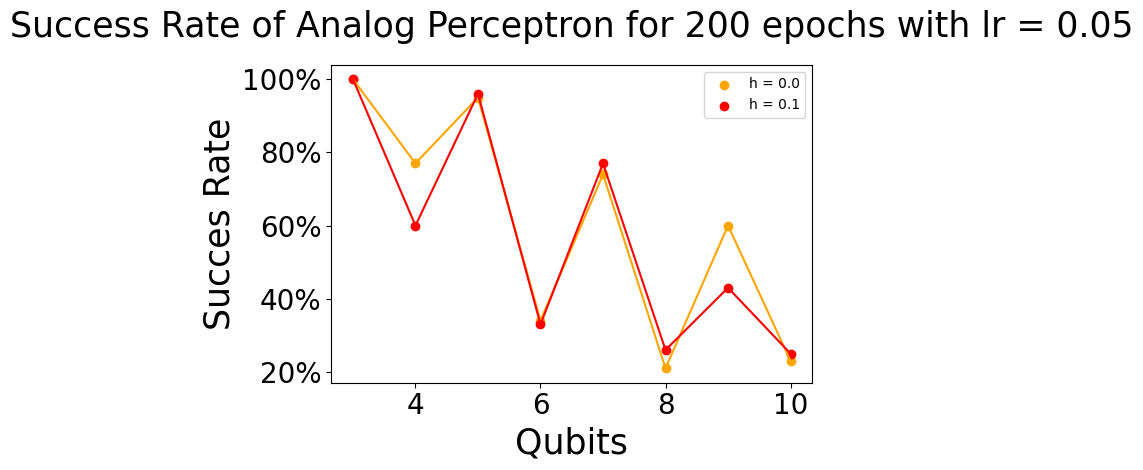

In [116]:
# Ground State Convergence statistics:
from matplotlib.ticker import PercentFormatter


lowest_energies = []
mean_energies = []
frequencies = []
qubit_number = []
transverse_fields = []

for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    simulation_results = problem['simulation_results']
    spectrum_dict = simulation_results['spectrum_dictionary']

    # Ground State Data

    ground_state_data = spectrum_dict['0_excited_state']
    # training_distance_statistics = ground_state_data['training_distance_statistics']

    ground_state_energy = ground_state_data['final_costs'][0]
    mean_ground_state_energy = ground_state_data['mean_cost']
    frequency = ground_state_data['frequency']

    lowest_energies.append(ground_state_energy)
    mean_energies.append(mean_ground_state_energy)
    frequencies.append(frequency)
    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)


fig, ax = plt.subplots()


frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field
ax.scatter(qubit_number[field_filter], frequencies[field_filter], c='orange', label = 'h = 0.0')
ax.plot(qubit_number[field_filter], frequencies[field_filter], c='orange')

# 0.1 Field

ax.scatter(qubit_number[~field_filter], frequencies[~field_filter], c='red', label = 'h = 0.1')
ax.plot(qubit_number[~field_filter], frequencies[~field_filter], c='red')

ax.set_ylabel('Succes Rate', fontsize=label_fontsize)
ax.set_xlabel('Qubits', fontsize=label_fontsize)
ax.set_title(f'Success Rate of Analog Perceptron for 200 epochs with lr = 0.05', fontsize=label_fontsize, pad=20)
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.tick_params(labelsize=tick_fontsize)


ax.legend(loc='upper right')

plt.tight_layout()

filename = results_path + 'success_rate_plot.pdf'


plt.savefig(filename, bbox_inches="tight")


# print(frequencies)

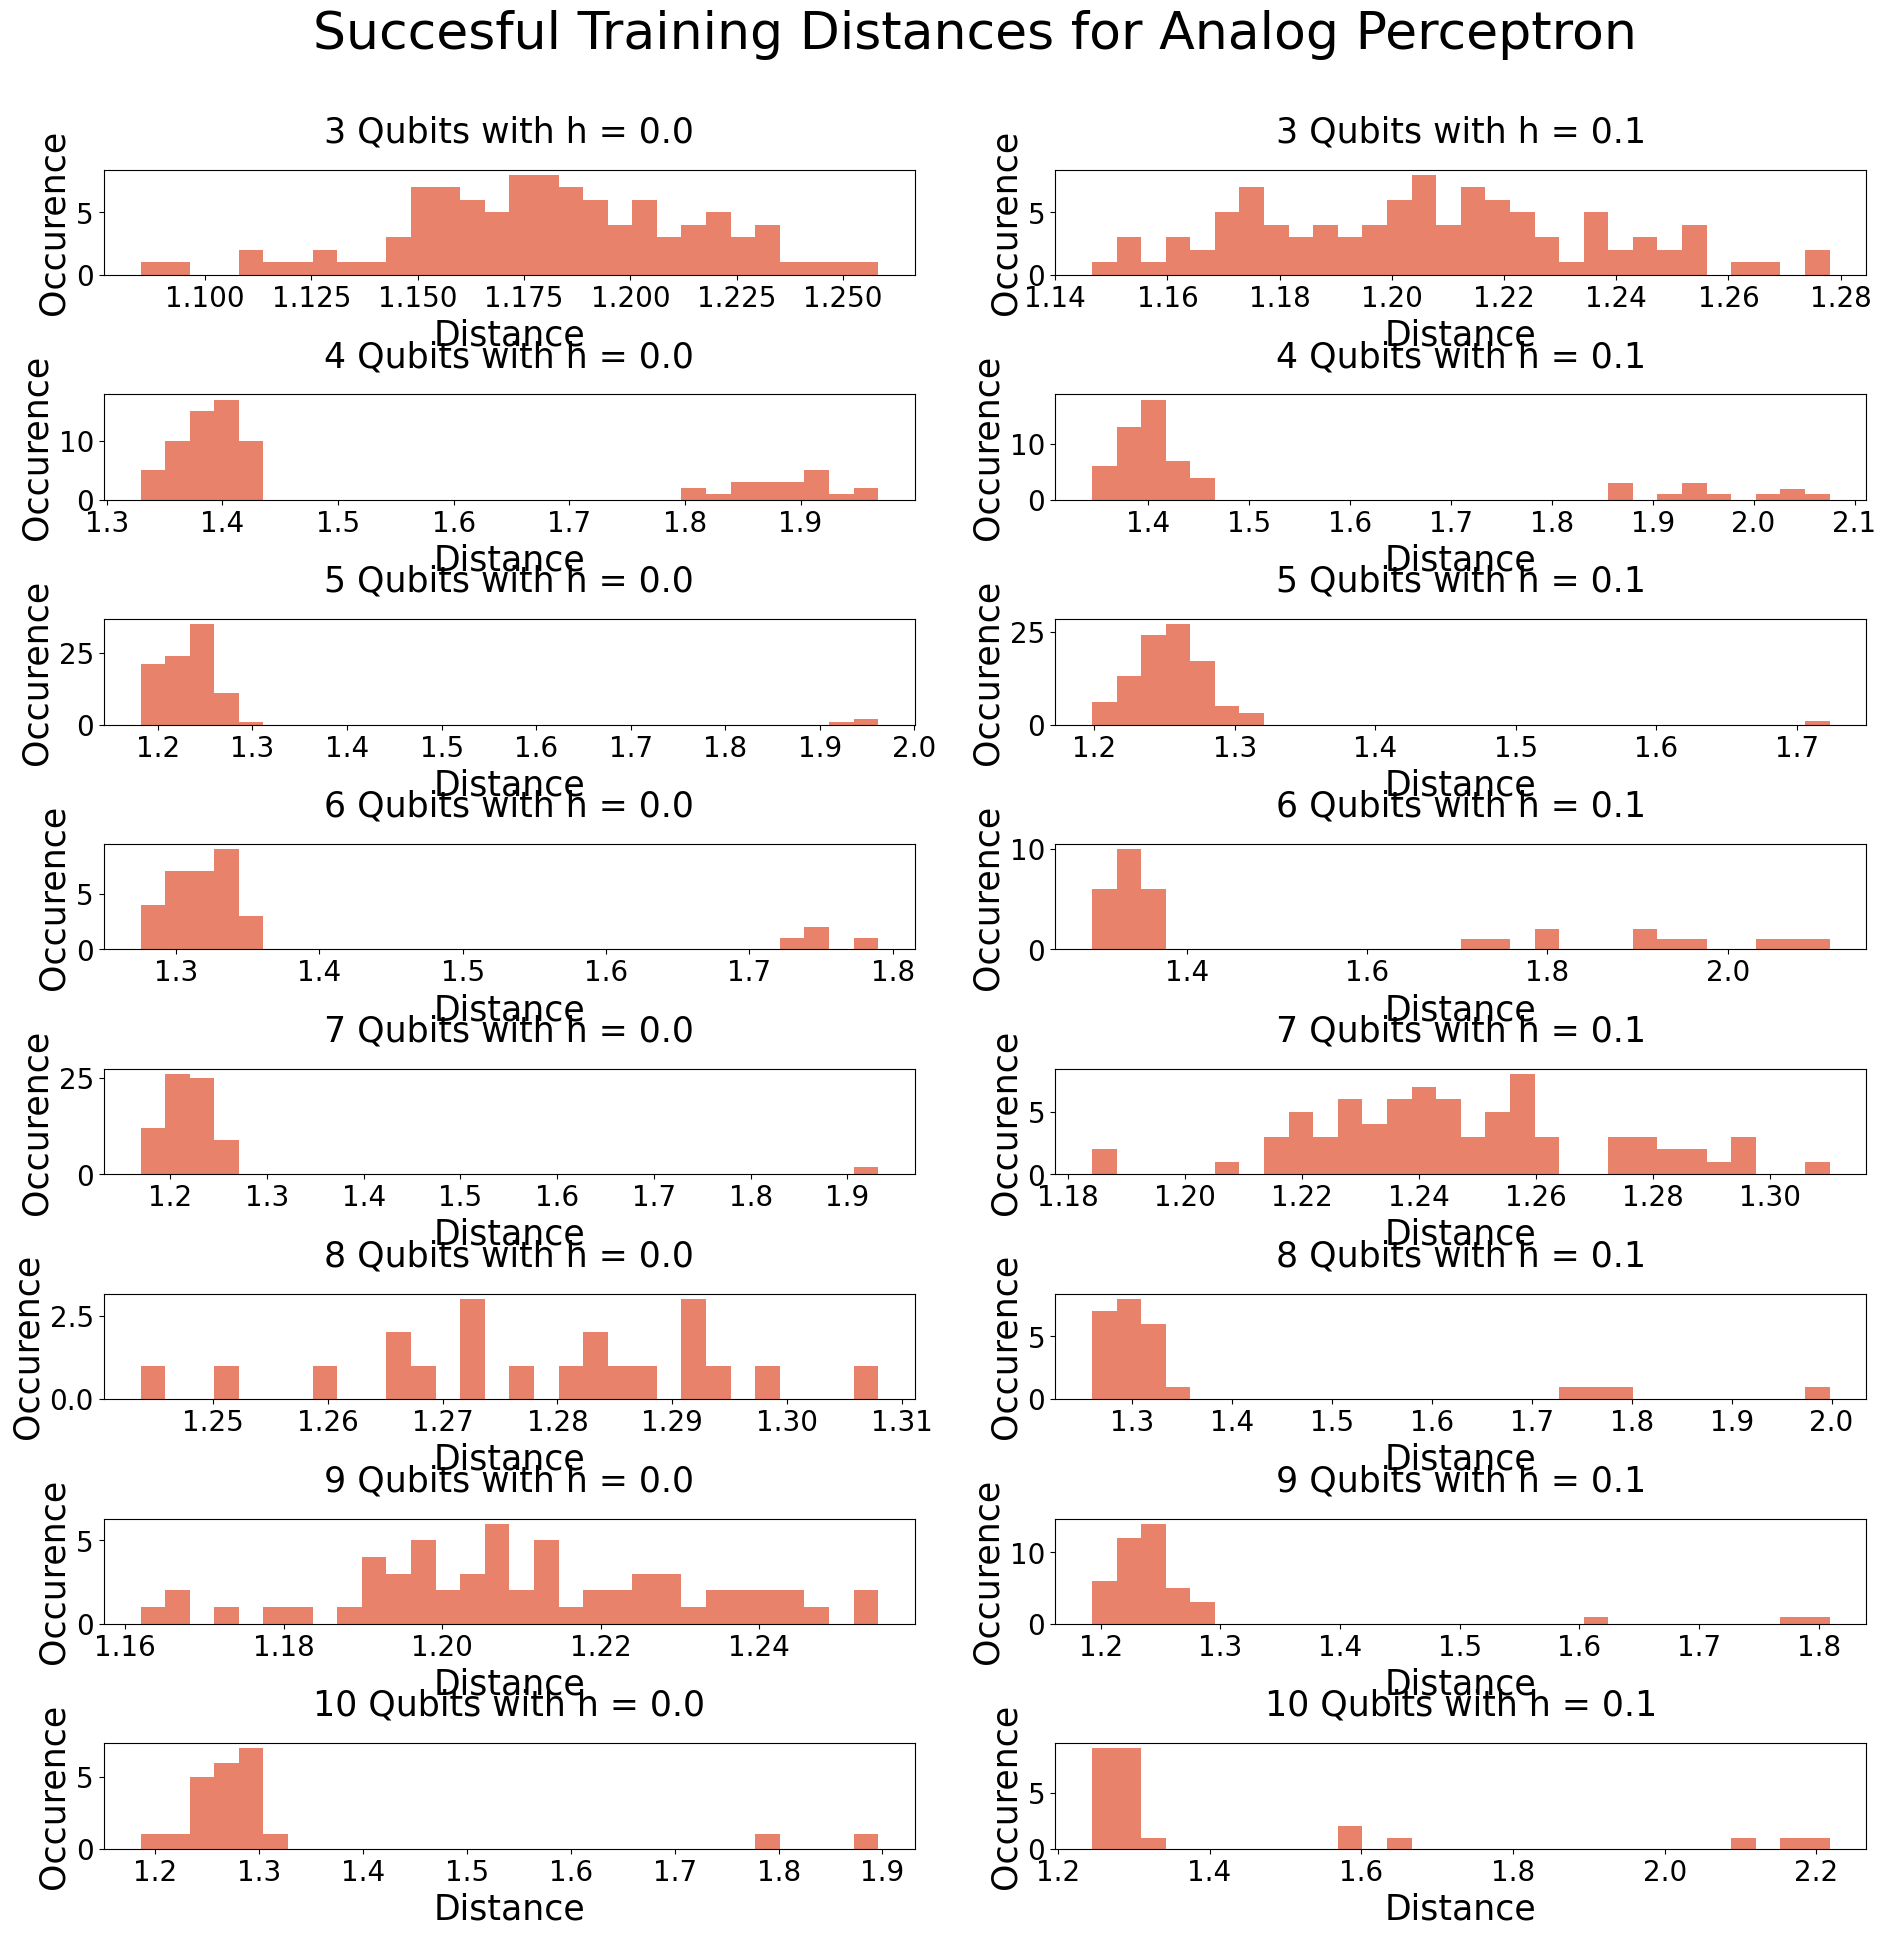

In [117]:
# Training Distance Statistics

MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        KL
        MN
        OP
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '7_0.0': 'I',
    '7_0.1': 'J',
    '8_0.0': 'K',
    '8_0.1': 'L',
    '9_0.0': 'M',
    '9_0.1': 'N',
    '10_0.0': 'O',
    '10_0.1': 'P',
}



std_training_distances = []
mean_training_distances = []
# frequencies = []
qubit_number = []
transverse_fields = []



fig_training, ax_dict_training = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig_training.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)

    simulation_results = problem['simulation_results']
    spectrum_dict = simulation_results['spectrum_dictionary']

    ground_state_data = spectrum_dict['0_excited_state']
    training_distance_statistics = ground_state_data['training_distance_statistics']

    ground_state_energy = ground_state_data['final_costs'][0]
    mean_ground_state_energy = ground_state_data['mean_cost']
    frequency = ground_state_data['frequency']

    training_distances = training_distance_statistics['distances']
    average_training_distance = training_distance_statistics['mean']
    median_training_distance = training_distance_statistics['median']
    std_training_distance = training_distance_statistics['std']

    mean_training_distances.append(average_training_distance)
    std_training_distances.append(std_training_distance)

    # print(training_distances)

    # fig, ax = plt.subplots()

    key = f'{n_qubits}_{h_parameter}'
    ax_key = ax_mapping[key]
    ax = ax_dict_training[ax_key]

    ax.hist(training_distances, bins=30, align="mid", color=plt.get_cmap("coolwarm", 7)(5), alpha=0.9)
    # ax.set_title(f"Succesful Training Distances for {n_qubits} Qubits with h = {h_parameter} (Digital)", fontsize=title_fontsize, pad=20)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Distance", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)



fig_training.suptitle(f"Succesful Training Distances for Analog Perceptron", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)


# plt.tight_layout()


filename = results_path + 'training_distances_histograms.pdf'


plt.savefig(filename, bbox_inches="tight")


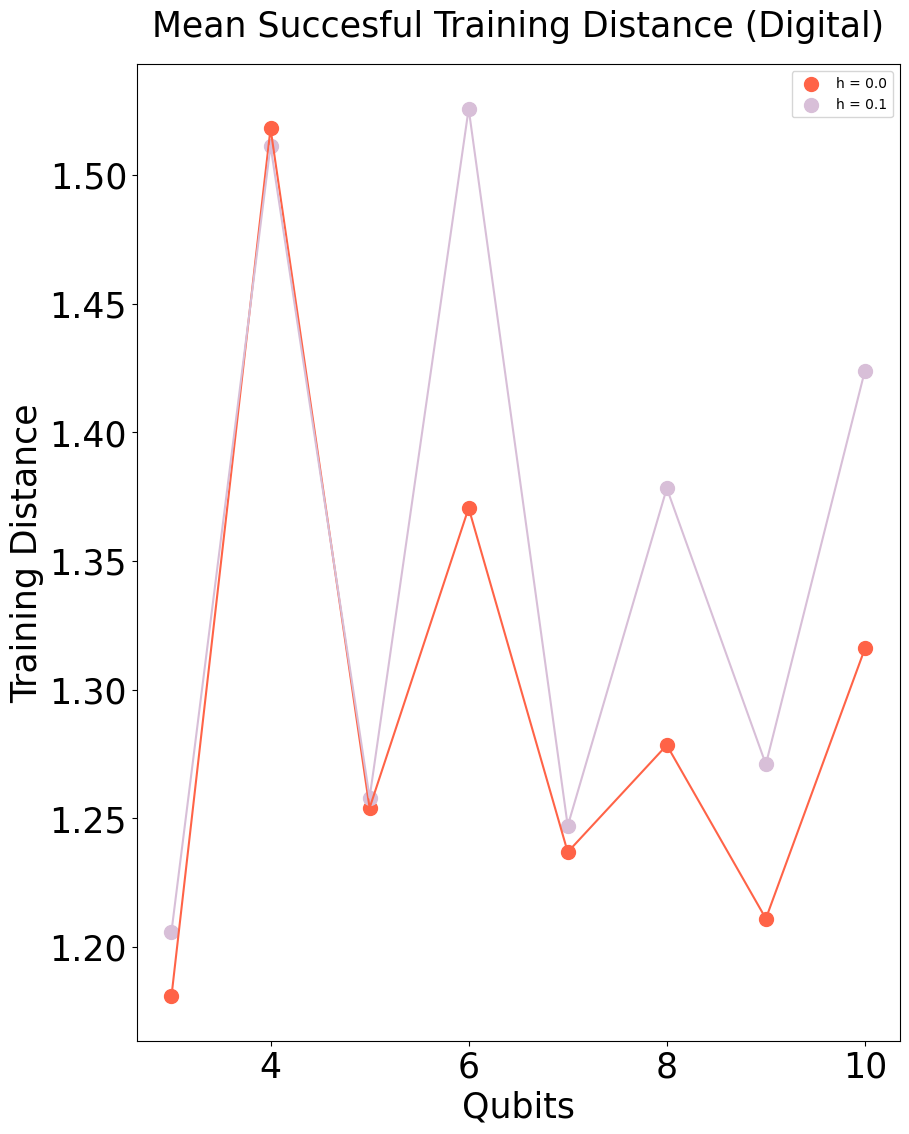

In [124]:
MOSAIC = """
        A
        """


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)
std_training_distances = np.asarray(std_training_distances)
mean_training_distances = np.asarray(mean_training_distances)

###############################
# Mean and Std plots


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(10,12))


fig.tight_layout(pad=7.0)


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field

ax_mean = ax_dict['A']

ax_mean.scatter(qubit_number[field_filter], mean_training_distances[field_filter], s=100, c='tomato', label = 'h = 0.0')
ax_mean.plot(qubit_number[field_filter], mean_training_distances[field_filter], c='tomato')

# 0.1 Field

ax_mean.scatter(qubit_number[~field_filter], mean_training_distances[~field_filter], s=100, c='thistle', label = 'h = 0.1')
ax_mean.plot(qubit_number[~field_filter], mean_training_distances[~field_filter], c='thistle')

ax_mean.set_ylabel('Training Distance', fontsize=title_fontsize)
ax_mean.set_xlabel('Qubits', fontsize=title_fontsize)
ax_mean.set_title(f'Mean Succesful Training Distance (Digital)', fontsize=title_fontsize, pad=20)
# ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
ax_mean.tick_params(labelsize=title_fontsize)

# ax_std = ax_dict['B']
ax_mean.legend()

# ax_std.scatter(qubit_number[field_filter], std_training_distances[field_filter], s=100, c='orange', label = 'h = 0.0')
# ax_std.plot(qubit_number[field_filter], std_training_distances[field_filter], c='orange')


# # 0.1 Field

# ax_std.scatter(qubit_number[~field_filter], std_training_distances[~field_filter], s=100, c='red', label = 'h = 0.1')
# ax_std.plot(qubit_number[~field_filter], std_training_distances[~field_filter], c='red')

# ax_std.set_ylabel('Training Distance', fontsize=label_fontsize)
# ax_std.set_xlabel('Qubits', fontsize=label_fontsize)
# ax_std.set_title(f'Std of Succesful Training Distance for 200 epochs with lr = 0.05 (Analog)', fontsize=label_fontsize, pad=20)
# # ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
# ax_std.tick_params(labelsize=tick_fontsize)


# ax_std.legend()
# ax_mean.set_aspect('auto')

# plt.tight_layout()

filename = results_path + 'training_distances_statistics_plots.pdf'


plt.savefig(filename, bbox_inches="tight")


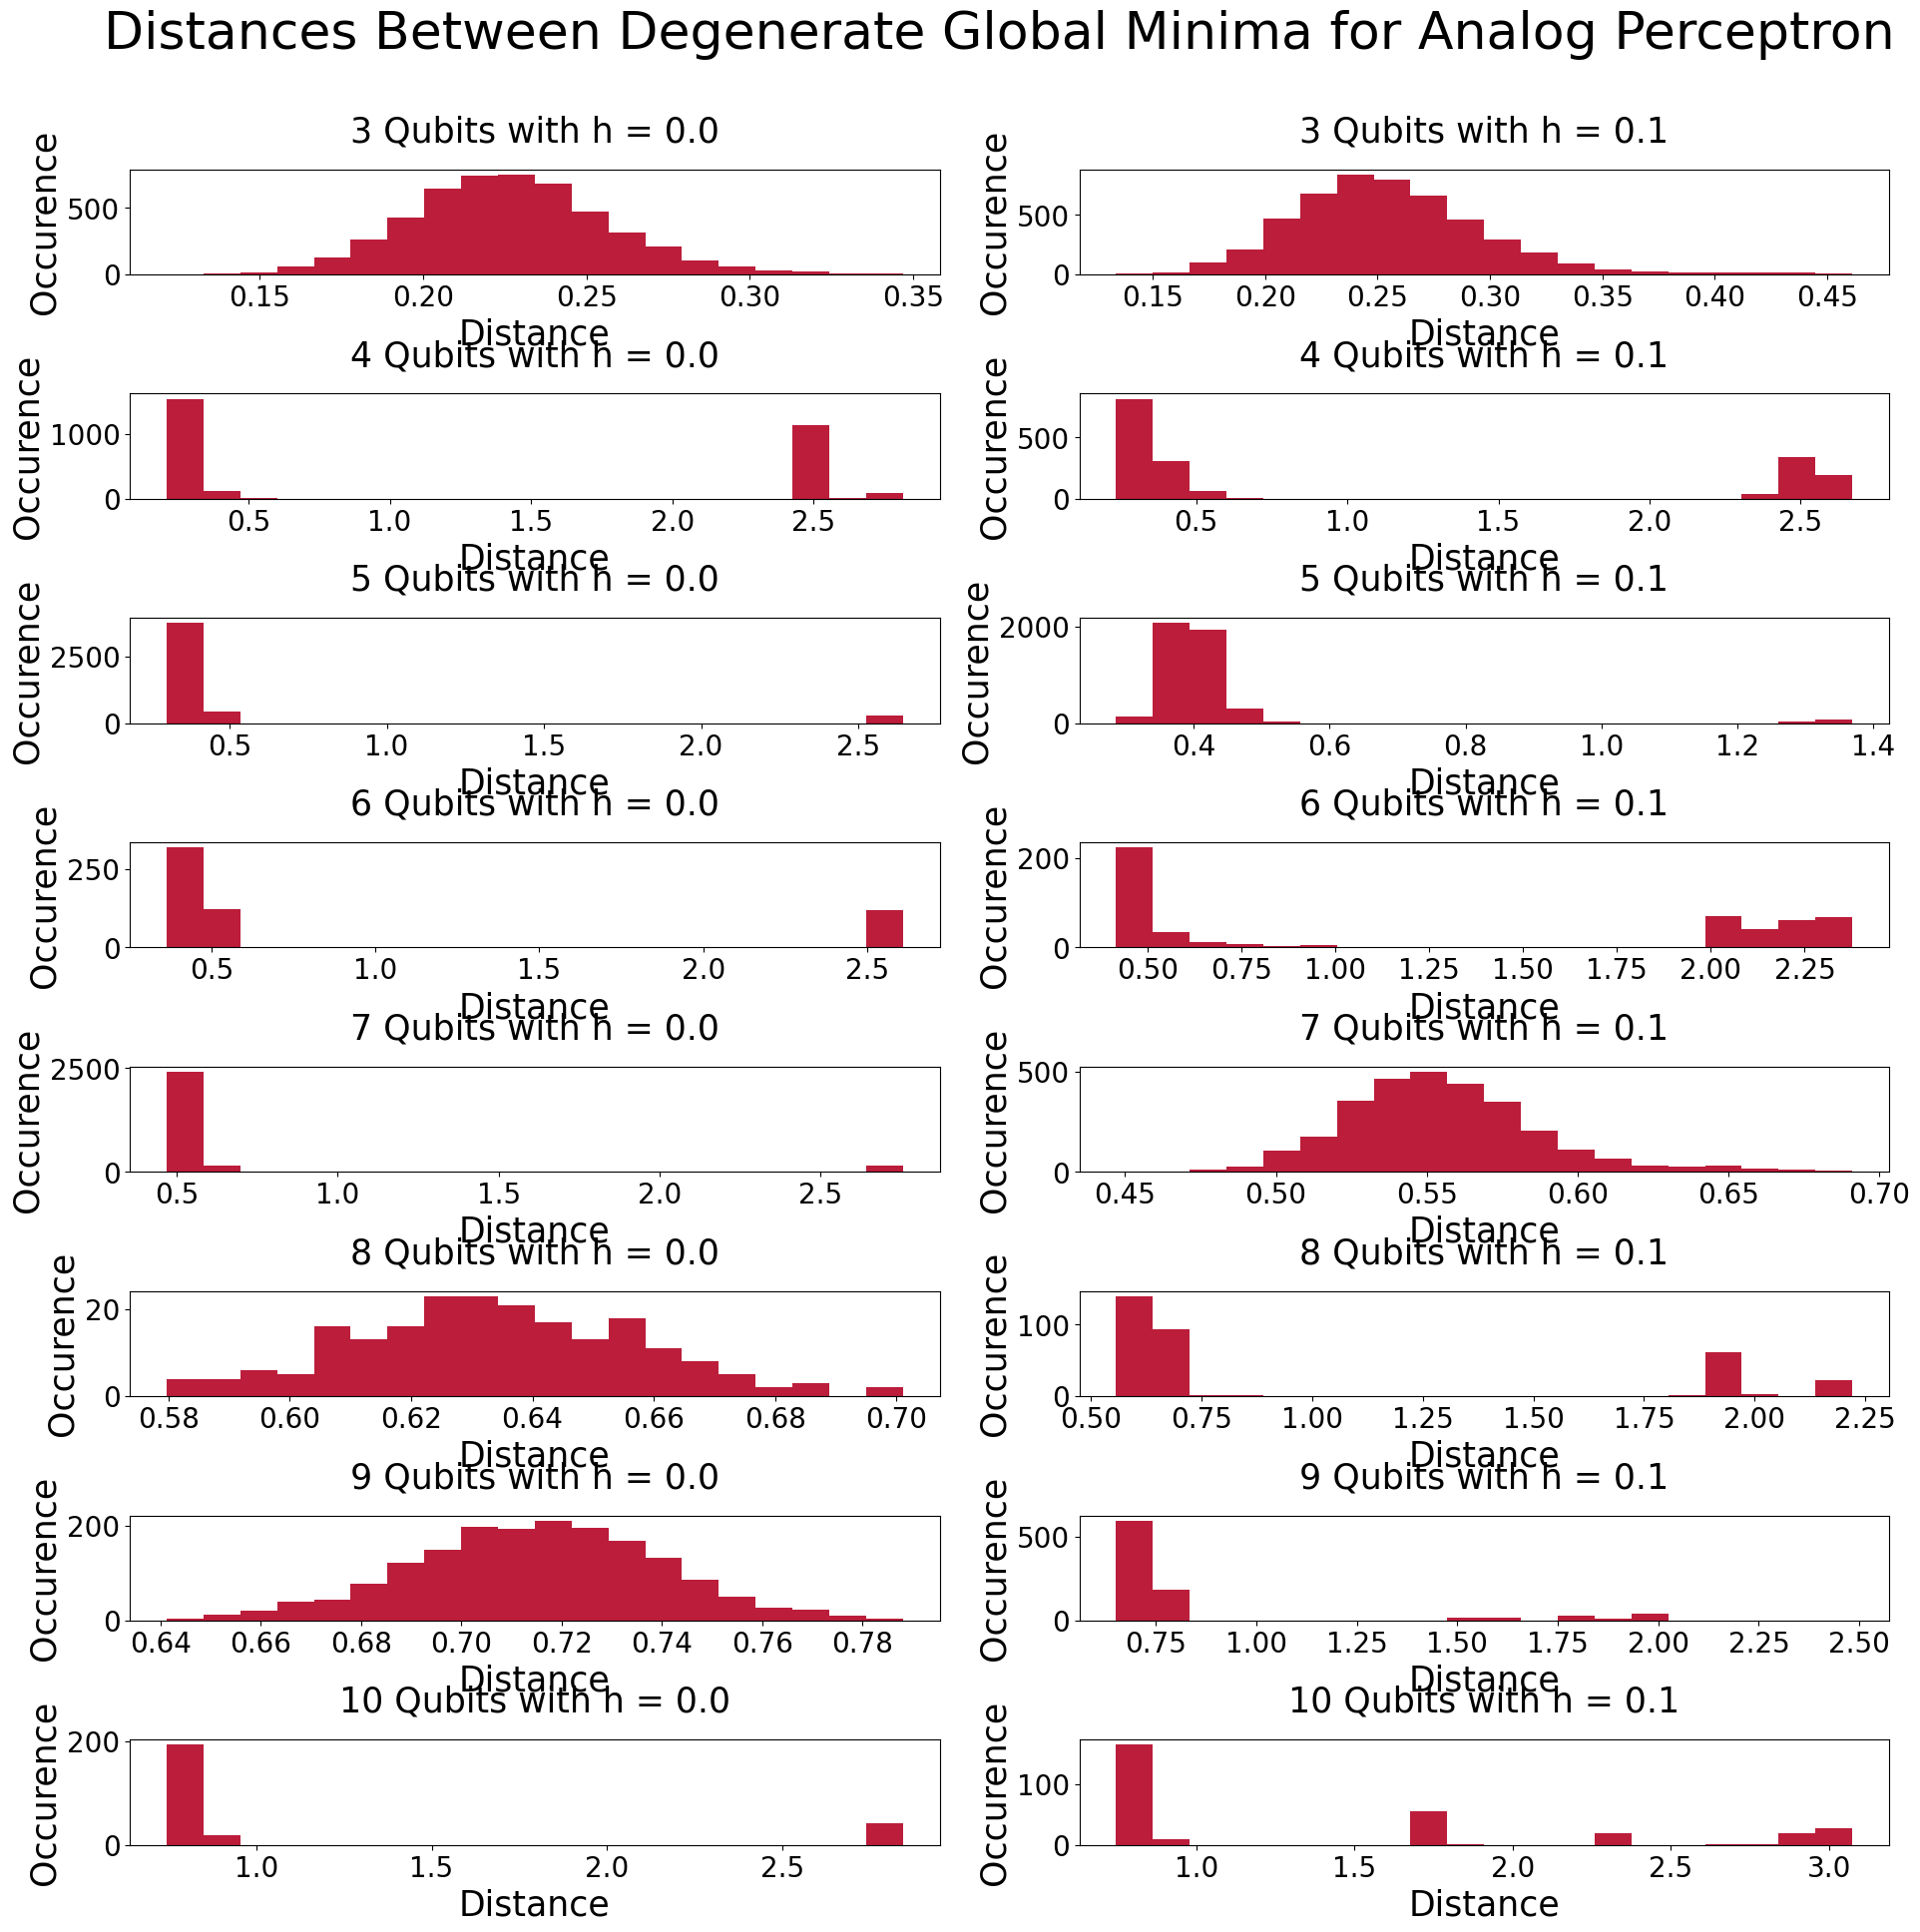

In [119]:
# Distance between minima Statistics

MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        KL
        MN
        OP
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '7_0.0': 'I',
    '7_0.1': 'J',
    '8_0.0': 'K',
    '8_0.1': 'L',
    '9_0.0': 'M',
    '9_0.1': 'N',
    '10_0.0': 'O',
    '10_0.1': 'P',
}



std_inner_distances = []
mean_inner_distances = []
# frequencies = []
qubit_number = []
transverse_fields = []



fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)

    simulation_results = problem['simulation_results']
    spectrum_dict = simulation_results['spectrum_dictionary']

    ground_state_data = spectrum_dict['0_excited_state']
    distance_between_minima_statistics = ground_state_data['distance_between_minima_statistics']

    ground_state_energy = ground_state_data['final_costs'][0]
    mean_ground_state_energy = ground_state_data['mean_cost']
    frequency = ground_state_data['frequency']

    inner_distances = distance_between_minima_statistics['distances']
    average_distance = distance_between_minima_statistics['mean']
    median_distance = distance_between_minima_statistics['median']
    std_distance = distance_between_minima_statistics['std']

    mean_inner_distances.append(average_distance)
    std_inner_distances.append(std_distance)

    # fig, ax = plt.subplots()

    key = f'{n_qubits}_{h_parameter}'
    ax_key = ax_mapping[key]
    # print(key)
    ax = ax_dict[ax_key]
    # print(ax)

    # print(inner_distances)
    # print(average_distance)

    # print(inner_distances)

    ax.hist(inner_distances, bins = 20, align="mid", color=plt.get_cmap("coolwarm", 7)(9), alpha=0.9)
    # ax.set_title(f"Succesful Training Distances for {n_qubits} Qubits with h = {h_parameter} (Digital)", fontsize=title_fontsize, pad=20)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Distance", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)



fig.suptitle(f"Distances Between Degenerate Global Minima for Analog Perceptron", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)

# plt.show()
# # plt.tight_layout()


filename = results_path + 'distances_between_degenerate_global_minima_histograms.pdf'


plt.savefig(filename, bbox_inches="tight")




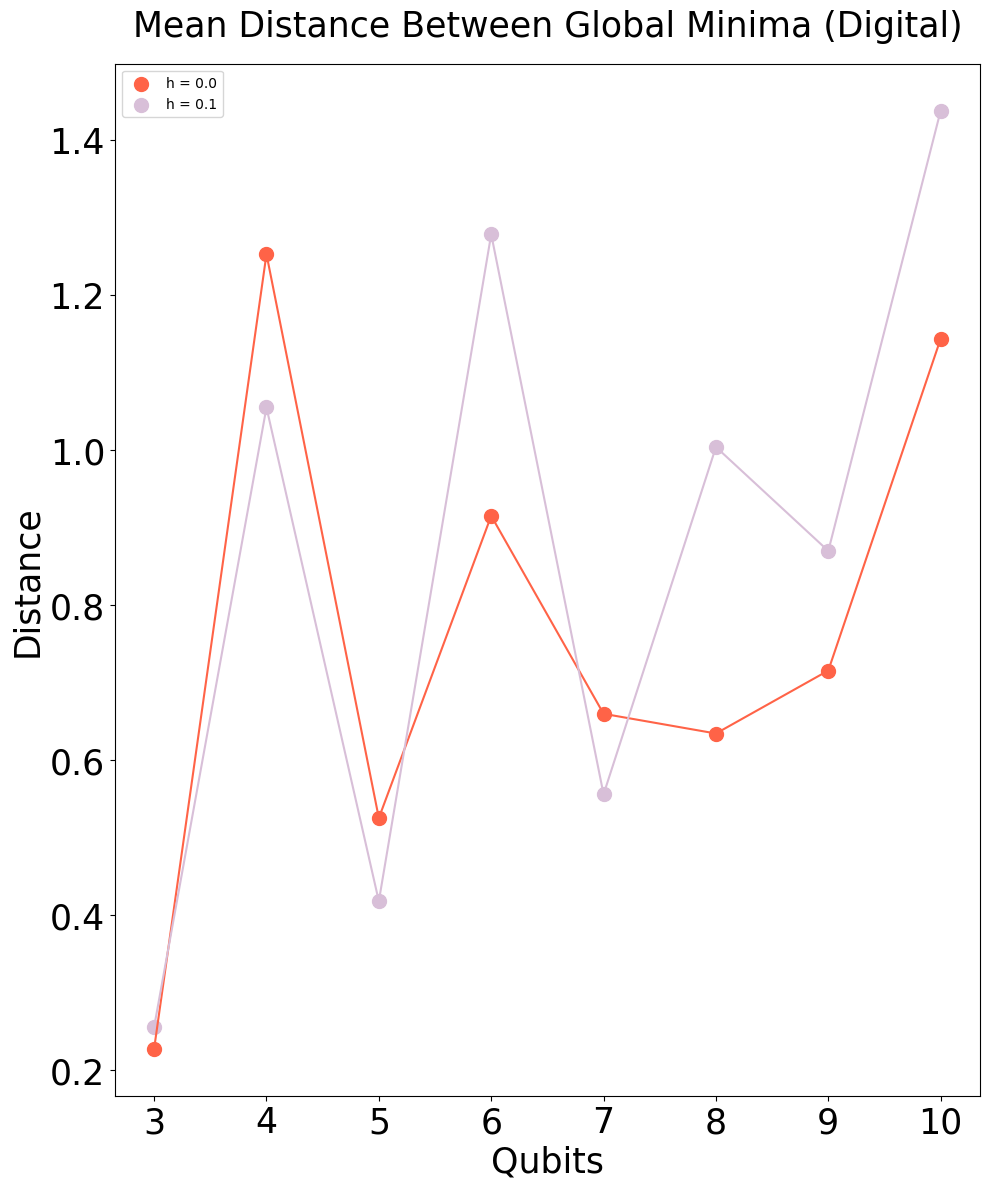

In [120]:
MOSAIC = """
        A
        """


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)
std_inner_distances = np.asarray(std_inner_distances)
mean_inner_distances = np.asarray(mean_inner_distances)

###############################
# Mean and Std plots


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(10,12))


fig.tight_layout(pad=7.0)


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field

ax_mean = ax_dict['A']

ax_mean.scatter(qubit_number[field_filter], mean_inner_distances[field_filter], s=100, c='tomato', label = 'h = 0.0')
ax_mean.plot(qubit_number[field_filter], mean_inner_distances[field_filter], c='tomato')

# 0.1 Field

ax_mean.scatter(qubit_number[~field_filter], mean_inner_distances[~field_filter], s=100, c='thistle', label = 'h = 0.1')
ax_mean.plot(qubit_number[~field_filter], mean_inner_distances[~field_filter], c='thistle')

ax_mean.set_ylabel('Distance', fontsize=title_fontsize)
ax_mean.set_xlabel('Qubits', fontsize=title_fontsize)
ax_mean.set_title(f'Mean Distance Between Global Minima (Digital)', fontsize=title_fontsize, pad=20)
# ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
ax_mean.tick_params(labelsize=title_fontsize)

# ax_std = ax_dict['B']


# ax_std.scatter(qubit_number[field_filter], std_inner_distances[field_filter], s=100, c='orange', label = 'h = 0.0')
# ax_std.plot(qubit_number[field_filter], std_inner_distances[field_filter], c='orange')


# 0.1 Field

# ax_std.scatter(qubit_number[~field_filter], std_inner_distances[~field_filter], s=100, c='red', label = 'h = 0.1')
# ax_std.plot(qubit_number[~field_filter], std_inner_distances[~field_filter], c='red')

# ax_std.set_ylabel('Distance', fontsize=label_fontsize)
# ax_std.set_xlabel('Qubits', fontsize=label_fontsize)
# ax_std.set_title(f'Std of Distance Between Minima for 200 epochs with lr = 0.05 (Analog)', fontsize=label_fontsize, pad=20)
# # ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
# ax_std.tick_params(labelsize=tick_fontsize)


# ax_std.legend()
ax_mean.legend()

plt.tight_layout()


filename = results_path + 'distances_between_degenerate_global_minima_statistics.pdf'


plt.savefig(filename, bbox_inches="tight")


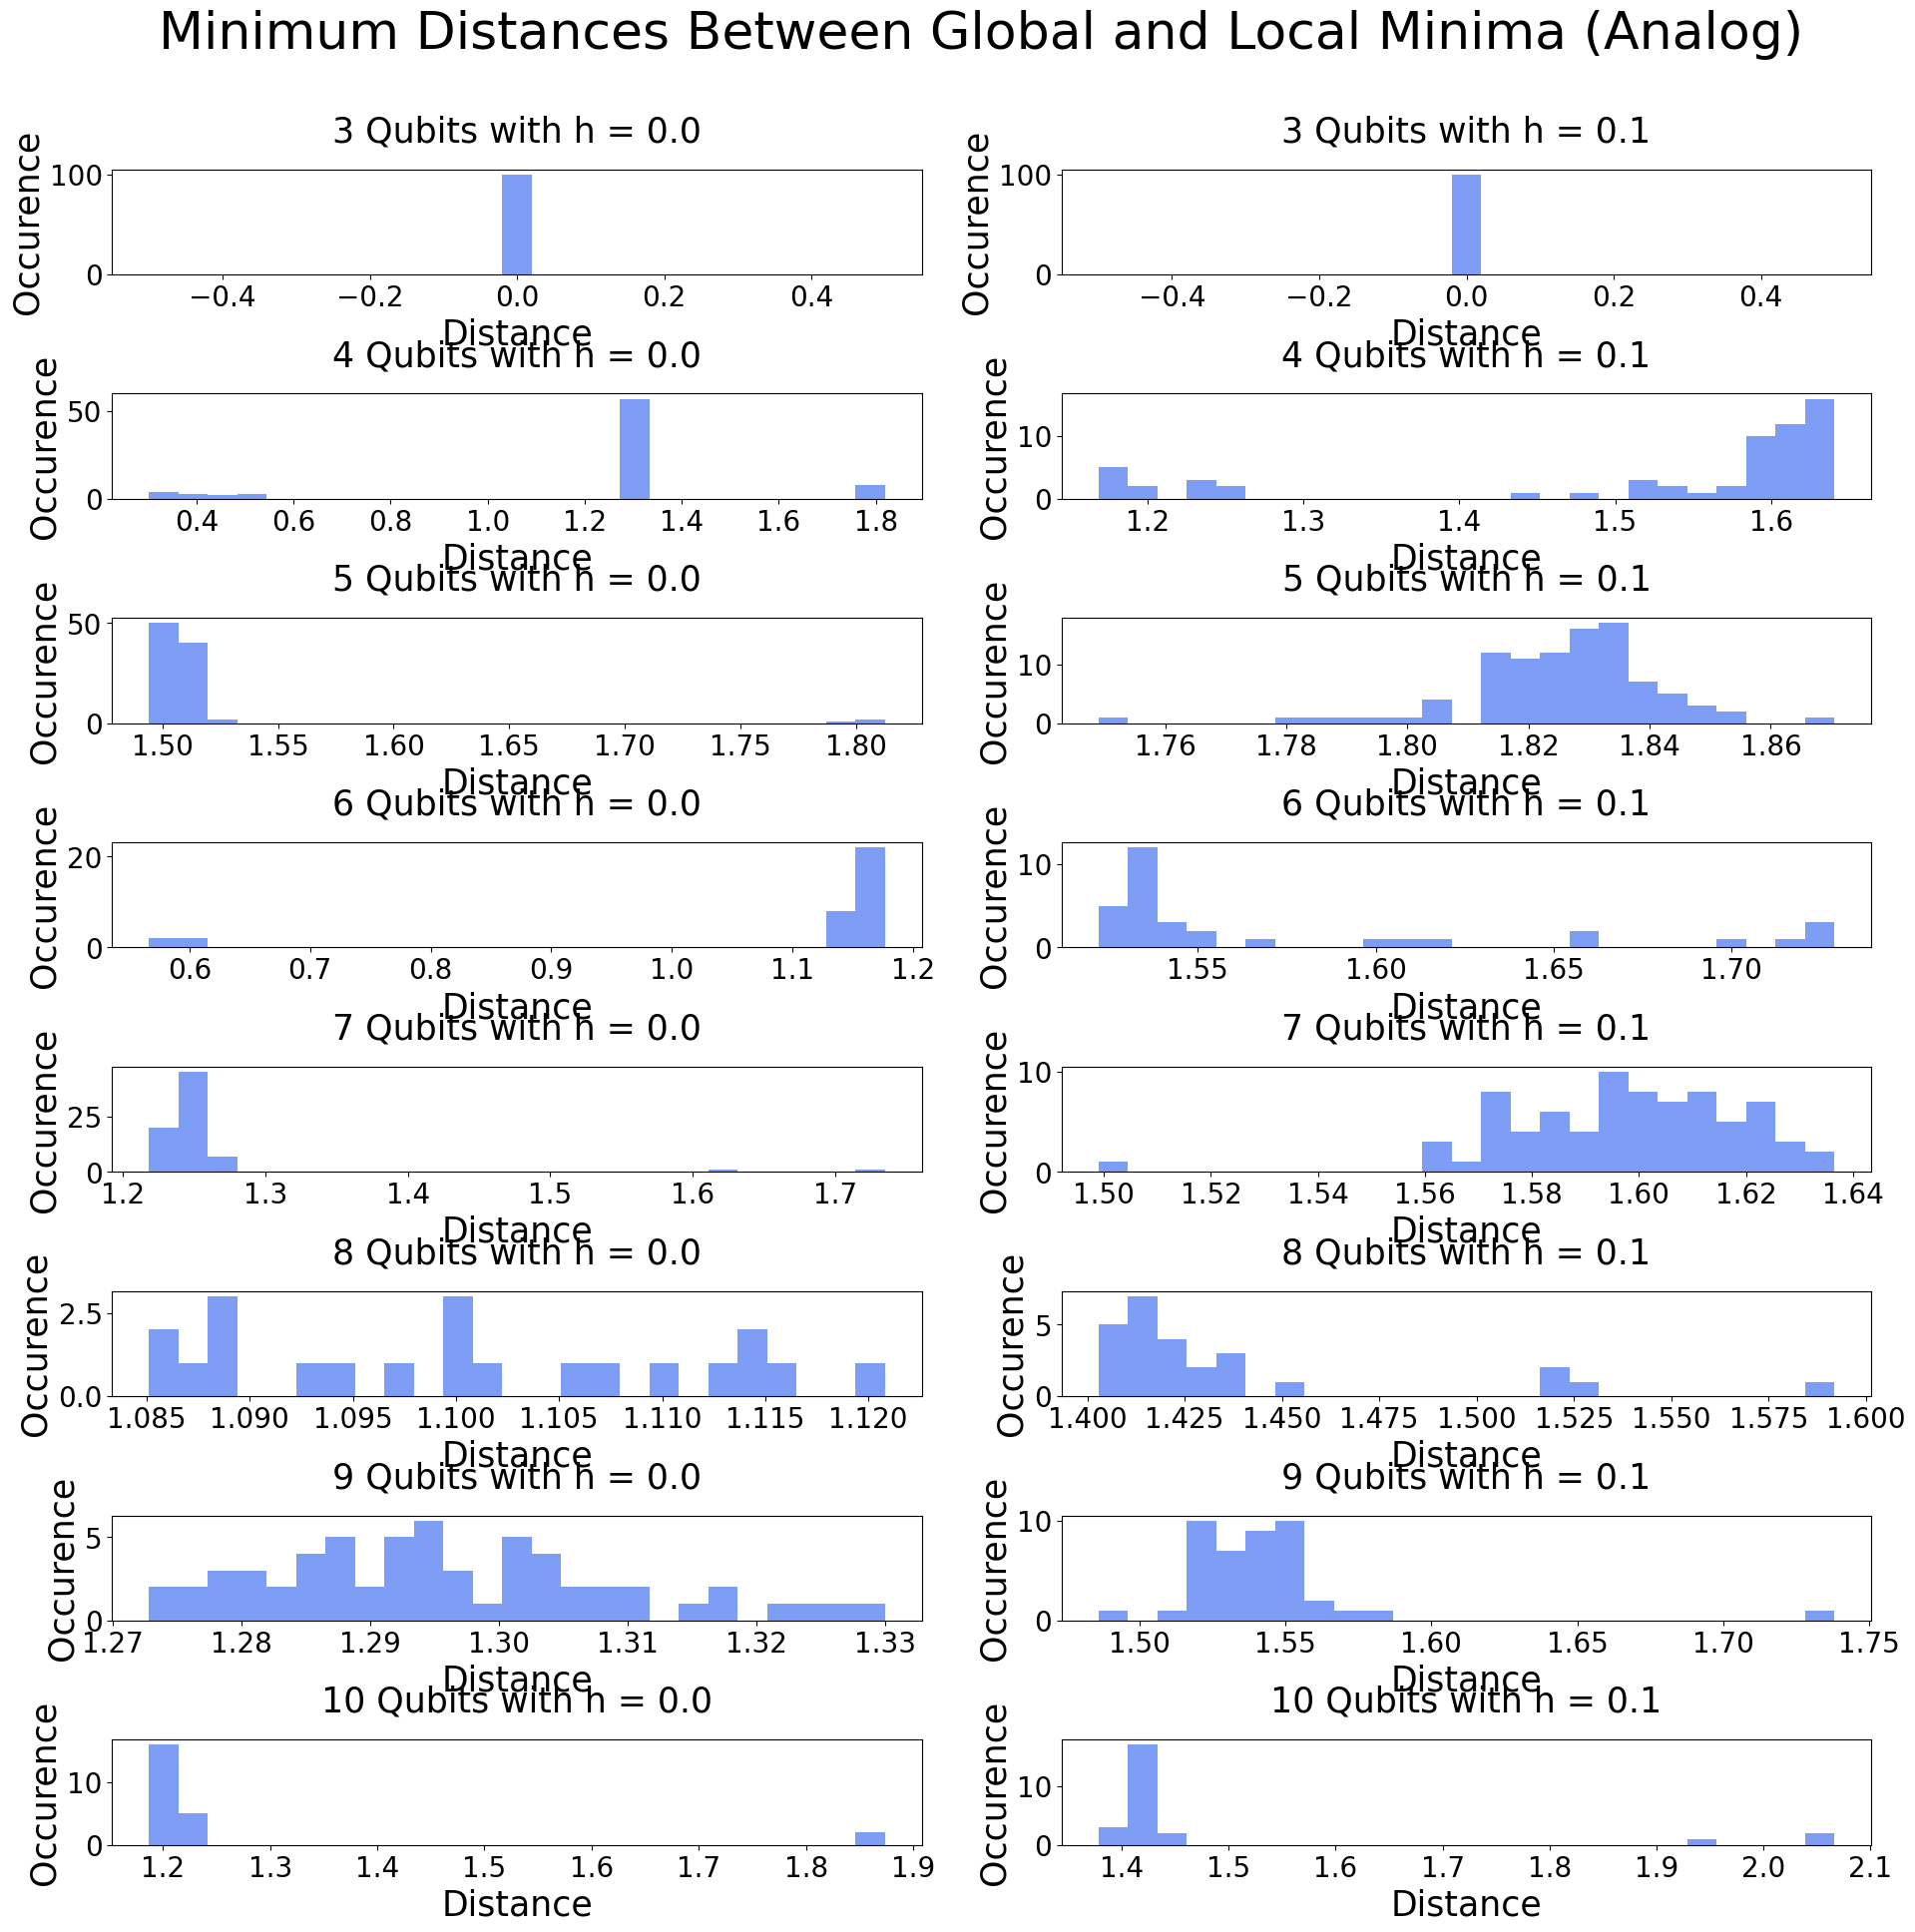

In [121]:
from scipy.spatial.distance import cdist


MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        KL
        MN
        OP
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '7_0.0': 'I',
    '7_0.1': 'J',
    '8_0.0': 'K',
    '8_0.1': 'L',
    '9_0.0': 'M',
    '9_0.1': 'N',
    '10_0.0': 'O',
    '10_0.1': 'P',
}


std_min_distances = []
average_min_distances = []
# frequencies = []
qubit_number = []
transverse_fields = []


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig.tight_layout(pad=7.0)

for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)

    simulation_results = problem['simulation_results']
    final_parameters_split = simulation_results['final_parameters_split']

    # Ground State Data

    # ground_state_para = spectrum_dict['0_excited_state']

    global_minima_final_parameters = final_parameters_split[0]

    # first_excited_state_data = spectrum_dict['1_excited_state']

    if len(final_parameters_split[1:]) > 0:
        local_minima_final_parameters = np.concatenate(final_parameters_split[1:])

    else:
        local_minima_final_parameters = global_minima_final_parameters

    # print(local_minima_final_parameters.shape)
    # print(global_minima_final_parameters.shape)

    distances = cdist(global_minima_final_parameters, local_minima_final_parameters)/(1)

    min_distances = np.min(distances, axis=1)

    average_distances = np.mean(distances, axis=1)
    std_distances = np.std(distances, axis=1)

    average_min_distance = np.mean(min_distances)
    std_min_distance = np.std(min_distances)

    average_min_distances.append(average_min_distance)
    std_min_distances.append(std_min_distance)

    key = f'{n_qubits}_{h_parameter}'
    ax_key = ax_mapping[key]
    # print(key)
    ax = ax_dict[ax_key]


    ax.hist(min_distances, bins = 25, align="mid", color=plt.get_cmap("coolwarm", 7)(1), alpha=0.9)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter} (Digital)", fontsize=title_fontsize, pad=20)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Distance", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)



fig.suptitle('Minimum Distances Between Global and Local Minima (Analog)', fontsize=title_fontsize*1.5)


plt.subplots_adjust(top=0.9)


filename = results_path + 'minimum_distances_between_global_local_minima_histogram.pdf'


plt.savefig(filename, bbox_inches="tight")




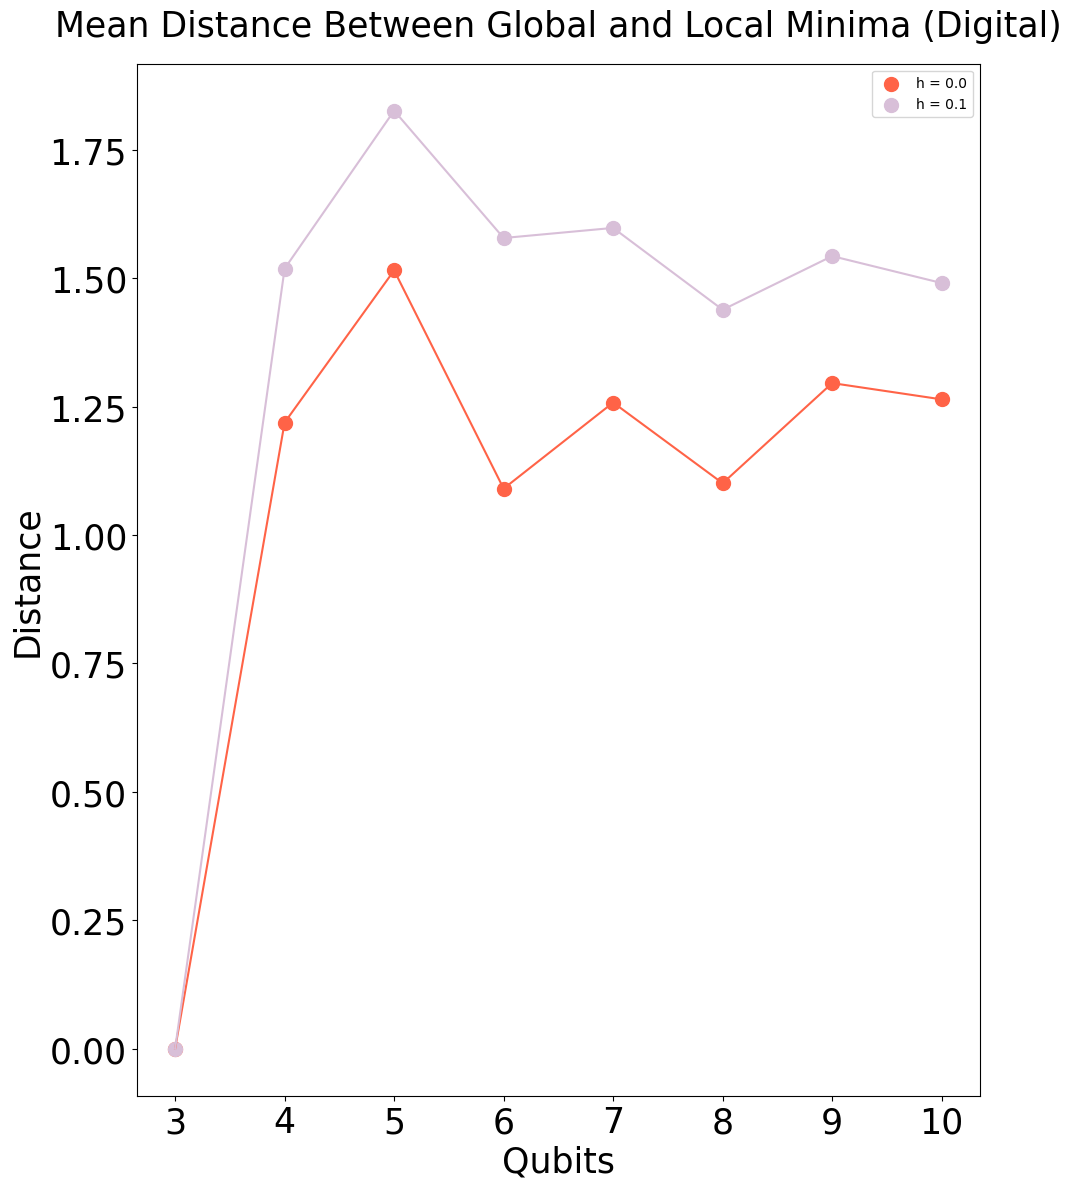

In [122]:
MOSAIC = """
        A
        """


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)
std_min_distances = np.asarray(std_min_distances)
average_min_distances = np.asarray(average_min_distances)

###############################
# Mean and Std plots


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(10,12))


fig.tight_layout(pad=7.0)


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field

ax_mean = ax_dict['A']

ax_mean.scatter(qubit_number[field_filter], average_min_distances[field_filter], s=100, c='tomato', label = 'h = 0.0')
ax_mean.plot(qubit_number[field_filter], average_min_distances[field_filter], c='tomato')

# 0.1 Field

ax_mean.scatter(qubit_number[~field_filter], average_min_distances[~field_filter], s=100, c='thistle', label = 'h = 0.1')
ax_mean.plot(qubit_number[~field_filter], average_min_distances[~field_filter], c='thistle')

ax_mean.set_ylabel('Distance', fontsize=title_fontsize)
ax_mean.set_xlabel('Qubits', fontsize=title_fontsize)
ax_mean.set_title(f'Mean Distance Between Global and Local Minima (Digital)', fontsize=title_fontsize, pad=20)
# ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
ax_mean.tick_params(labelsize=title_fontsize)

# ax_std = ax_dict['B']


# ax_std.scatter(qubit_number[field_filter], std_min_distances[field_filter], s=100, c='orange', label = 'h = 0.0')
# ax_std.plot(qubit_number[field_filter], std_min_distances[field_filter], c='orange')


# # 0.1 Field

# ax_std.scatter(qubit_number[~field_filter], std_min_distances[~field_filter], s=100, c='red', label = 'h = 0.1')
# ax_std.plot(qubit_number[~field_filter], std_min_distances[~field_filter], c='red')

# ax_std.set_ylabel('Distance', fontsize=label_fontsize)
# ax_std.set_xlabel('Qubits', fontsize=label_fontsize)
# ax_std.set_title(f'Std of Distance Between Global and Local Minima for 200 epochs with lr = 0.05 (Analog)', fontsize=label_fontsize, pad=20)
# # ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
# ax_std.tick_params(labelsize=tick_fontsize)


# ax_std.legend()
ax_mean.legend()

plt.tight_layout()


filename = results_path + 'minimum_distances_between_global_local_minima_statistics.pdf'


plt.savefig(filename, bbox_inches="tight")


In [123]:
LOSS_LANDSCAPES_RESULTS_PATH = '/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/Loss_landscapes/Results/Digital_Results.pickle'

import pickle

with open(LOSS_LANDSCAPES_RESULTS_PATH, 'wb') as f:
    pickle.dump(vqe_problems, f)